# Coherence metric per generator

Average Coherence Ratings by Model:
claude 3.5 sonnet: 4.14 (n = 140, 95% CI [4.00, 4.29])
gemini 1.5 pro: 3.82 (n = 144, 95% CI [3.66, 3.98])
gpt-4o: 3.67 (n = 81, 95% CI [3.45, 3.88])
llama-3.2: 3.59 (n = 75, 95% CI [3.35, 3.83])
pixtral large: 3.46 (n = 100, 95% CI [3.23, 3.69])
qwen-2: 3.85 (n = 97, 95% CI [3.65, 4.05])
qwq: 3.59 (n = 46, 95% CI [3.27, 3.90])
humans: 3.89 (n = 426, 95% CI [3.79, 3.98])


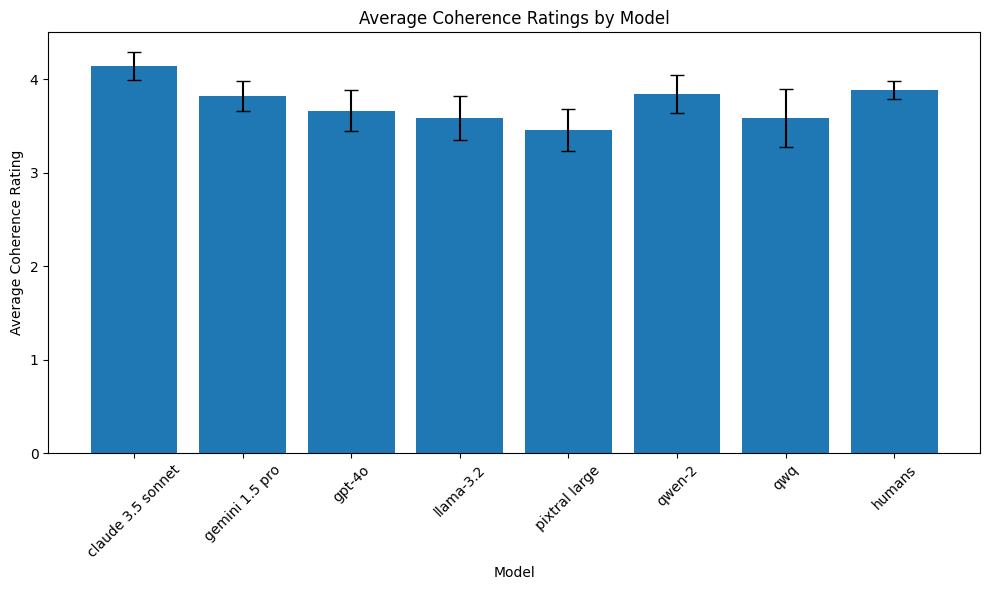

Plot saved as: ../results/postselection_data/coherence_by_model_20250409_145739.png


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Mapping from Meme Identifier to Model Name ---
model_mapping = {
    "meme1": "claude 3.5 sonnet",
    "meme2": "gemini 1.5 pro",
    "meme3": "gpt-4o",
    "meme4": "llama-3.2",
    "meme5": "pixtral large",
    "meme6": "qwen-2",
    "meme7": "qwq",
    "meme8": "humans"
}

# --- Extract Columns for Coherence Ratings ---
# These columns follow the pattern "claimX_memeY_coherence"
coherence_cols = [col for col in df_post.columns if re.search(r"_coherence$", col)]

# --- Aggregate Coherence Ratings per Model ---
model_ratings = {model: [] for model in model_mapping.values()}

for col in coherence_cols:
    # Extract the meme identifier (e.g., "meme1" from "claim1_meme1_coherence")
    match = re.search(r"claim\d+_(meme\d+)_coherence", col)
    if match:
        meme_id = match.group(1)  # e.g., "meme1"
        model_name = model_mapping.get(meme_id)
        if model_name:
            ratings = pd.to_numeric(df_post[col], errors='coerce').dropna()
            model_ratings[model_name].extend(ratings.tolist())

# --- Compute Summary Statistics per Model ---
model_stats = {}
for model, ratings in model_ratings.items():
    ratings_array = np.array(ratings)
    count = len(ratings_array)
    if count > 0:
        mean_val = np.mean(ratings_array)
        std_val = np.std(ratings_array, ddof=1)
        se = std_val / np.sqrt(count)
        ci_half = 1.96 * se  # 95% CI half-width
        model_stats[model] = {
            "mean": mean_val,
            "count": count,
            "std": std_val,
            "se": se,
            "ci_half": ci_half
        }
    else:
        model_stats[model] = {
            "mean": np.nan,
            "count": 0,
            "std": np.nan,
            "se": np.nan,
            "ci_half": np.nan
        }

# --- Print Detailed Text Output with Confidence Intervals ---
print("Average Coherence Ratings by Model:")
for model in model_mapping.values():
    stats_dict = model_stats[model]
    if stats_dict['count'] > 0:
        lower = stats_dict['mean'] - stats_dict['ci_half']
        upper = stats_dict['mean'] + stats_dict['ci_half']
        print(f"{model}: {stats_dict['mean']:.2f} (n = {stats_dict['count']}, 95% CI [{lower:.2f}, {upper:.2f}])")
    else:
        print(f"{model}: No data available.")

# --- Plot the Average Coherence Ratings with 95% Confidence Intervals ---
order = ["claude 3.5 sonnet", "gemini 1.5 pro", "gpt-4o", "llama-3.2", 
         "pixtral large", "qwen-2", "qwq", "humans"]

means = [model_stats[model]["mean"] for model in order]
error_bars = [model_stats[model]["ci_half"] for model in order]

plt.figure(figsize=(10,6))
plt.bar(order, means, yerr=error_bars, capsize=5)
plt.xlabel("Model")
plt.ylabel("Average Coherence Rating")
plt.title("Average Coherence Ratings by Model")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to the plots/postselection_data directory with a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/coherence_by_model_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

print("Plot saved as:", plot_filename)

# Clarity per generator

Average Clarity Ratings by Model:
claude 3.5 sonnet: 4.14 (n = 140), 95% CI [4.00, 4.28]
gemini 1.5 pro: 3.98 (n = 144), 95% CI [3.83, 4.13]
gpt-4o: 3.60 (n = 81), 95% CI [3.39, 3.82]
llama-3.2: 3.59 (n = 75), 95% CI [3.34, 3.83]
pixtral large: 3.66 (n = 100), 95% CI [3.44, 3.88]
qwen-2: 3.80 (n = 97), 95% CI [3.62, 3.98]
qwq: 3.57 (n = 46), 95% CI [3.28, 3.86]
humans: 3.93 (n = 426), 95% CI [3.84, 4.01]


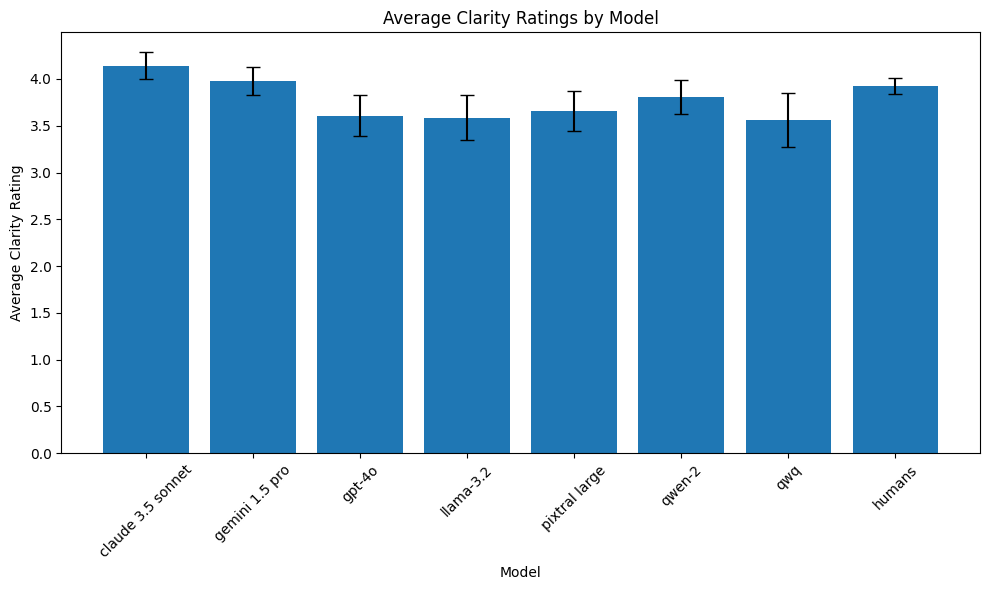

Plot saved as: ../results/postselection_data/clarity_by_model_20250409_145816.png


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Mapping from Meme Identifier to Model Name ---
model_mapping = {
    "meme1": "claude 3.5 sonnet",
    "meme2": "gemini 1.5 pro",
    "meme3": "gpt-4o",
    "meme4": "llama-3.2",
    "meme5": "pixtral large",
    "meme6": "qwen-2",
    "meme7": "qwq",
    "meme8": "humans"
}

# --- Extract Columns for Clarity Ratings ---
# These columns follow the pattern "claimX_memeY_clarity"
clarity_cols = [col for col in df_post.columns if re.search(r"_clarity$", col)]

# --- Aggregate Clarity Ratings per Model ---
model_ratings = {model: [] for model in model_mapping.values()}

for col in clarity_cols:
    # Extract the meme identifier (e.g., "meme1" from "claim1_meme1_clarity")
    match = re.search(r"claim\d+_(meme\d+)_clarity", col)
    if match:
        meme_id = match.group(1)  # e.g., "meme1"
        model_name = model_mapping.get(meme_id)
        if model_name:
            # Convert the column values to numeric and drop NaNs
            ratings = pd.to_numeric(df_post[col], errors='coerce').dropna().tolist()
            model_ratings[model_name].extend(ratings)

# --- Compute Summary Statistics per Model ---
model_stats = {}
for model, ratings in model_ratings.items():
    ratings_array = np.array(ratings)
    count = len(ratings_array)
    if count > 0:
        mean_val = np.mean(ratings_array)
        std_val = np.std(ratings_array, ddof=1)
        se = std_val / np.sqrt(count)
        ci_half = 1.96 * se  # 95% confidence interval half-width
        lower_bound = mean_val - ci_half
        upper_bound = mean_val + ci_half
        model_stats[model] = {
            "mean": mean_val,
            "count": count,
            "std": std_val,
            "se": se,
            "ci_half": ci_half,
            "ci_lower": lower_bound,
            "ci_upper": upper_bound
        }
    else:
        model_stats[model] = {
            "mean": np.nan,
            "count": 0,
            "std": np.nan,
            "se": np.nan,
            "ci_half": np.nan,
            "ci_lower": np.nan,
            "ci_upper": np.nan
        }

# --- Print Detailed Text Output with Confidence Intervals ---
print("Average Clarity Ratings by Model:")
for model in model_mapping.values():
    stats_dict = model_stats[model]
    if stats_dict['count'] > 0:
        print(f"{model}: {stats_dict['mean']:.2f} (n = {stats_dict['count']}), 95% CI [{stats_dict['ci_lower']:.2f}, {stats_dict['ci_upper']:.2f}]")
    else:
        print(f"{model}: No data available.")

# --- Plot the Average Clarity Ratings with 95% Confidence Intervals ---
order = ["claude 3.5 sonnet", "gemini 1.5 pro", "gpt-4o", "llama-3.2", 
         "pixtral large", "qwen-2", "qwq", "humans"]

means = [model_stats[model]["mean"] for model in order]
error_bars = [model_stats[model]["ci_half"] for model in order]

plt.figure(figsize=(10,6))
plt.bar(order, means, yerr=error_bars, capsize=5)
plt.xlabel("Model")
plt.ylabel("Average Clarity Rating")
plt.title("Average Clarity Ratings by Model")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot with a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/clarity_by_model_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

print("Plot saved as:", plot_filename)


# Hilarity per generator

Average Hilarity Ratings by Model:
claude 3.5 sonnet: 3.55 (n = 140), 95% CI [3.37, 3.73]
gemini 1.5 pro: 3.28 (n = 144), 95% CI [3.10, 3.46]
gpt-4o: 3.26 (n = 81), 95% CI [3.02, 3.50]
llama-3.2: 3.41 (n = 75), 95% CI [3.15, 3.68]
pixtral large: 3.15 (n = 100), 95% CI [2.90, 3.40]
qwen-2: 3.55 (n = 97), 95% CI [3.32, 3.77]
qwq: 3.28 (n = 46), 95% CI [2.92, 3.64]
humans: 3.61 (n = 426), 95% CI [3.50, 3.72]


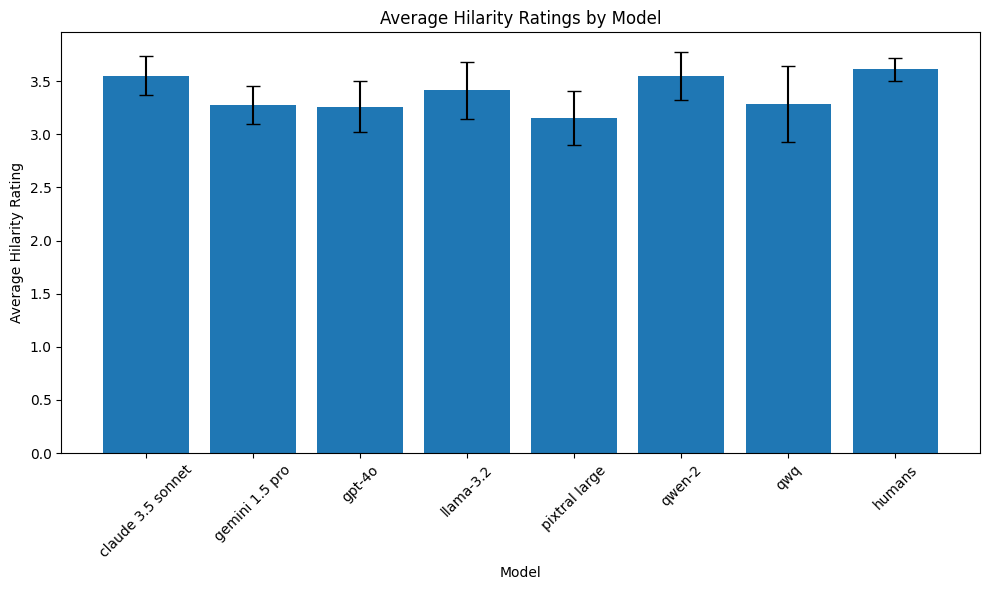

Plot saved as: ../results/postselection_data/hilarity_by_model_20250409_145829.png


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Mapping from Meme Identifier to Model Name ---
model_mapping = {
    "meme1": "claude 3.5 sonnet",
    "meme2": "gemini 1.5 pro",
    "meme3": "gpt-4o",
    "meme4": "llama-3.2",
    "meme5": "pixtral large",
    "meme6": "qwen-2",
    "meme7": "qwq",
    "meme8": "humans"
}

# --- Extract Columns for Hilarity Ratings ---
# These columns follow the pattern "claimX_memeY_hilarity"
hilarity_cols = [col for col in df_post.columns if re.search(r"_hilarity$", col)]

# --- Aggregate Hilarity Ratings per Model ---
model_ratings = {model: [] for model in model_mapping.values()}

for col in hilarity_cols:
    # Extract the meme identifier (e.g., "meme1" from "claim1_meme1_hilarity")
    match = re.search(r"claim\d+_(meme\d+)_hilarity", col)
    if match:
        meme_id = match.group(1)  # e.g., "meme1"
        model_name = model_mapping.get(meme_id)
        if model_name:
            # Convert the column values to numeric and drop NaNs
            ratings = pd.to_numeric(df_post[col], errors='coerce').dropna().tolist()
            model_ratings[model_name].extend(ratings)

# --- Compute Summary Statistics per Model ---
model_stats = {}
for model, ratings in model_ratings.items():
    ratings_array = np.array(ratings)
    count = len(ratings_array)
    if count > 0:
        mean_val = np.mean(ratings_array)
        std_val = np.std(ratings_array, ddof=1)
        se = std_val / np.sqrt(count)
        ci_half = 1.96 * se  # 95% confidence interval half-width
        lower_bound = mean_val - ci_half
        upper_bound = mean_val + ci_half
        model_stats[model] = {
            "mean": mean_val,
            "count": count,
            "std": std_val,
            "se": se,
            "ci_half": ci_half,
            "ci_lower": lower_bound,
            "ci_upper": upper_bound
        }
    else:
        model_stats[model] = {
            "mean": np.nan,
            "count": 0,
            "std": np.nan,
            "se": np.nan,
            "ci_half": np.nan,
            "ci_lower": np.nan,
            "ci_upper": np.nan
        }

# --- Print Detailed Text Output with Confidence Intervals ---
print("Average Hilarity Ratings by Model:")
for model in model_mapping.values():
    stats_dict = model_stats[model]
    if stats_dict['count'] > 0:
        print(f"{model}: {stats_dict['mean']:.2f} (n = {stats_dict['count']}), 95% CI [{stats_dict['ci_lower']:.2f}, {stats_dict['ci_upper']:.2f}]")
    else:
        print(f"{model}: No data available.")

# --- Plot the Average Hilarity Ratings with 95% Confidence Intervals ---
order = ["claude 3.5 sonnet", "gemini 1.5 pro", "gpt-4o", "llama-3.2", 
         "pixtral large", "qwen-2", "qwq", "humans"]

means = [model_stats[model]["mean"] for model in order]
error_bars = [model_stats[model]["ci_half"] for model in order]

plt.figure(figsize=(10,6))
plt.bar(order, means, yerr=error_bars, capsize=5)
plt.xlabel("Model")
plt.ylabel("Average Hilarity Rating")
plt.title("Average Hilarity Ratings by Model")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to the plots/postselection_data directory with a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/hilarity_by_model_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

print("Plot saved as:", plot_filename)


# Persuasiveness per generator

Average Persuasiveness Ratings by Model:
claude 3.5 sonnet: 3.59 (n = 140), 95% CI [3.42, 3.77]
gemini 1.5 pro: 3.48 (n = 144), 95% CI [3.30, 3.65]
gpt-4o: 3.30 (n = 81), 95% CI [3.08, 3.51]
llama-3.2: 3.32 (n = 75), 95% CI [3.05, 3.59]
pixtral large: 3.24 (n = 100), 95% CI [3.01, 3.47]
qwen-2: 3.51 (n = 97), 95% CI [3.29, 3.72]
qwq: 3.35 (n = 46), 95% CI [3.05, 3.64]
humans: 3.47 (n = 426), 95% CI [3.36, 3.57]


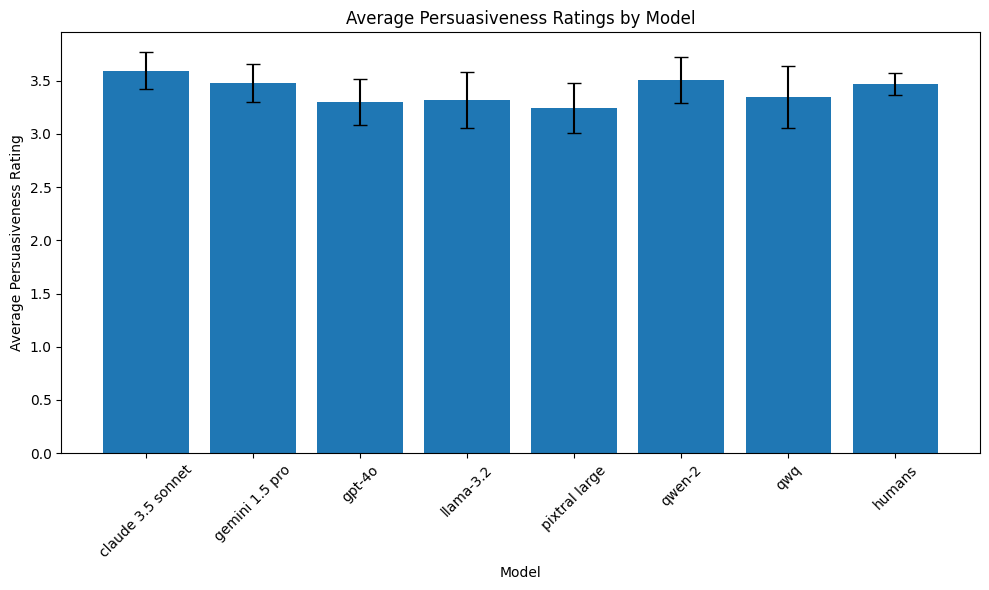

Plot saved as: ../results/postselection_data/persuasiveness_by_model_20250409_145839.png


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Mapping from Meme Identifier to Model Name ---
model_mapping = {
    "meme1": "claude 3.5 sonnet",
    "meme2": "gemini 1.5 pro",
    "meme3": "gpt-4o",
    "meme4": "llama-3.2",
    "meme5": "pixtral large",
    "meme6": "qwen-2",
    "meme7": "qwq",
    "meme8": "humans"
}

# --- Extract Columns for Persuasiveness Ratings ---
# These columns follow the pattern "claimX_memeY_persuasiveness"
persuasiveness_cols = [col for col in df_post.columns if re.search(r"_persuasiveness$", col)]

# --- Aggregate Persuasiveness Ratings per Model ---
model_ratings = {model: [] for model in model_mapping.values()}

for col in persuasiveness_cols:
    # Extract the meme identifier (e.g., "meme1" from "claim1_meme1_persuasiveness")
    match = re.search(r"claim\d+_(meme\d+)_persuasiveness", col)
    if match:
        meme_id = match.group(1)
        model_name = model_mapping.get(meme_id)
        if model_name:
            # Convert the column values to numeric and drop NaNs
            ratings = pd.to_numeric(df_post[col], errors='coerce').dropna().tolist()
            model_ratings[model_name].extend(ratings)

# --- Compute Summary Statistics per Model ---
model_stats = {}
for model, ratings in model_ratings.items():
    ratings_array = np.array(ratings)
    count = len(ratings_array)
    if count > 0:
        mean_val = np.mean(ratings_array)
        std_val = np.std(ratings_array, ddof=1)
        se = std_val / np.sqrt(count)
        ci_half = 1.96 * se  # 95% CI half-width
        lower_bound = mean_val - ci_half
        upper_bound = mean_val + ci_half
        model_stats[model] = {
            "mean": mean_val,
            "count": count,
            "std": std_val,
            "se": se,
            "ci_half": ci_half,
            "ci_lower": lower_bound,
            "ci_upper": upper_bound
        }
    else:
        model_stats[model] = {
            "mean": np.nan,
            "count": 0,
            "std": np.nan,
            "se": np.nan,
            "ci_half": np.nan,
            "ci_lower": np.nan,
            "ci_upper": np.nan
        }

# --- Print Detailed Text Output with Confidence Intervals ---
print("Average Persuasiveness Ratings by Model:")
for model in model_mapping.values():
    stats_dict = model_stats[model]
    if stats_dict['count'] > 0:
        print(f"{model}: {stats_dict['mean']:.2f} (n = {stats_dict['count']}), 95% CI [{stats_dict['ci_lower']:.2f}, {stats_dict['ci_upper']:.2f}]")
    else:
        print(f"{model}: No data available.")

# --- Plot the Average Persuasiveness Ratings with 95% Confidence Intervals ---
order = ["claude 3.5 sonnet", "gemini 1.5 pro", "gpt-4o", "llama-3.2", 
         "pixtral large", "qwen-2", "qwq", "humans"]

means = [model_stats[model]["mean"] for model in order]
error_bars = [model_stats[model]["ci_half"] for model in order]

plt.figure(figsize=(10,6))
plt.bar(order, means, yerr=error_bars, capsize=5)
plt.xlabel("Model")
plt.ylabel("Average Persuasiveness Rating")
plt.title("Average Persuasiveness Ratings by Model")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot with a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/persuasiveness_by_model_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

print("Plot saved as:", plot_filename)

# Template conveyance

Average Template Conveyance Ratings by Model:
claude 3.5 sonnet: 3.90 (n = 140), 95% CI [3.74, 4.06]
gemini 1.5 pro: 3.75 (n = 144), 95% CI [3.59, 3.91]
gpt-4o: 3.62 (n = 81), 95% CI [3.39, 3.85]
llama-3.2: 3.59 (n = 75), 95% CI [3.38, 3.80]
pixtral large: 3.46 (n = 100), 95% CI [3.24, 3.68]
qwen-2: 3.78 (n = 97), 95% CI [3.60, 3.97]
qwq: 3.67 (n = 46), 95% CI [3.39, 3.95]
humans: 3.82 (n = 426), 95% CI [3.73, 3.91]


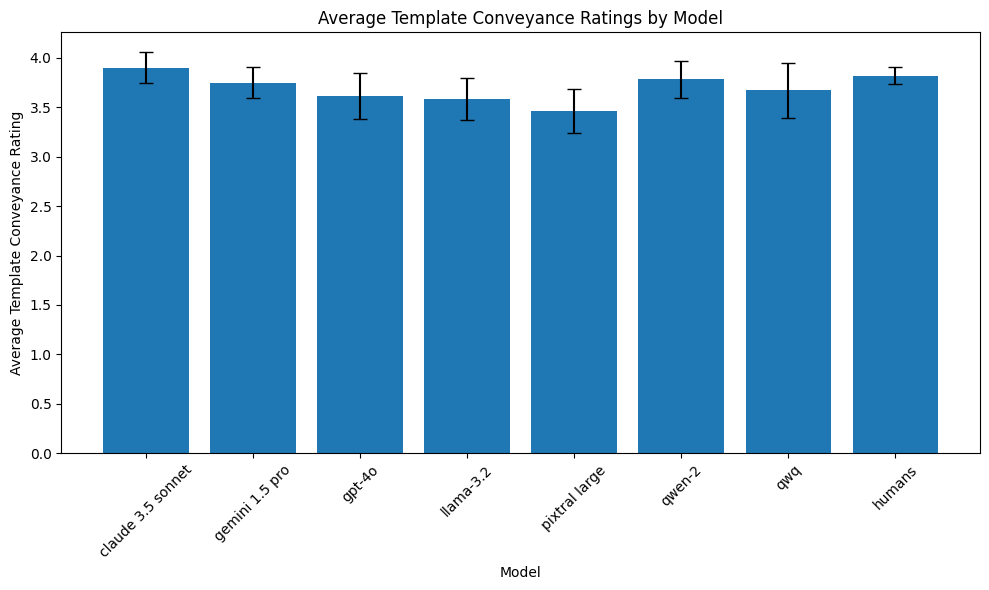

Plot saved as: ../results/postselection_data/template_conveyance_by_model_20250409_145855.png


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Mapping from Meme Identifier to Model Name ---
model_mapping = {
    "meme1": "claude 3.5 sonnet",
    "meme2": "gemini 1.5 pro",
    "meme3": "gpt-4o",
    "meme4": "llama-3.2",
    "meme5": "pixtral large",
    "meme6": "qwen-2",
    "meme7": "qwq",
    "meme8": "humans"
}

# --- Extract Columns for Template Conveyance Ratings ---
# These columns follow the pattern "claimX_memeY_template_conveyance"
template_cols = [col for col in df_post.columns if re.search(r"_template_conveyance$", col)]

# --- Aggregate Template Conveyance Ratings per Model ---
model_ratings = {model: [] for model in model_mapping.values()}

for col in template_cols:
    # Extract the meme identifier (e.g., "meme1" from "claim1_meme1_template_conveyance")
    match = re.search(r"claim\d+_(meme\d+)_template_conveyance", col)
    if match:
        meme_id = match.group(1)  # e.g., "meme1"
        model_name = model_mapping.get(meme_id)
        if model_name:
            # Convert the column values to numeric and drop NaNs
            ratings = pd.to_numeric(df_post[col], errors='coerce').dropna().tolist()
            model_ratings[model_name].extend(ratings)

# --- Compute Summary Statistics per Model ---
model_stats = {}
for model, ratings in model_ratings.items():
    ratings_array = np.array(ratings)
    count = len(ratings_array)
    if count > 0:
        mean_val = np.mean(ratings_array)
        std_val = np.std(ratings_array, ddof=1)
        se = std_val / np.sqrt(count)
        ci_half = 1.96 * se  # 95% confidence interval half-width
        lower_bound = mean_val - ci_half
        upper_bound = mean_val + ci_half
        model_stats[model] = {
            "mean": mean_val,
            "count": count,
            "std": std_val,
            "se": se,
            "ci_half": ci_half,
            "ci_lower": lower_bound,
            "ci_upper": upper_bound
        }
    else:
        model_stats[model] = {
            "mean": np.nan,
            "count": 0,
            "std": np.nan,
            "se": np.nan,
            "ci_half": np.nan,
            "ci_lower": np.nan,
            "ci_upper": np.nan
        }

# --- Print Detailed Text Output with Confidence Intervals ---
print("Average Template Conveyance Ratings by Model:")
for model in model_mapping.values():
    stats_dict = model_stats[model]
    if stats_dict['count'] > 0:
        print(f"{model}: {stats_dict['mean']:.2f} (n = {stats_dict['count']}), 95% CI [{stats_dict['ci_lower']:.2f}, {stats_dict['ci_upper']:.2f}]")
    else:
        print(f"{model}: No data available.")

# --- Plot the Average Template Conveyance Ratings with 95% Confidence Intervals ---
order = ["claude 3.5 sonnet", "gemini 1.5 pro", "gpt-4o", "llama-3.2", 
         "pixtral large", "qwen-2", "qwq", "humans"]

means = [model_stats[model]["mean"] for model in order]
error_bars = [model_stats[model]["ci_half"] for model in order]

plt.figure(figsize=(10,6))
plt.bar(order, means, yerr=error_bars, capsize=5)
plt.xlabel("Model")
plt.ylabel("Average Template Conveyance Rating")
plt.title("Average Template Conveyance Ratings by Model")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot with a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/template_conveyance_by_model_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

print("Plot saved as:", plot_filename)

# Average of all metrics per generator

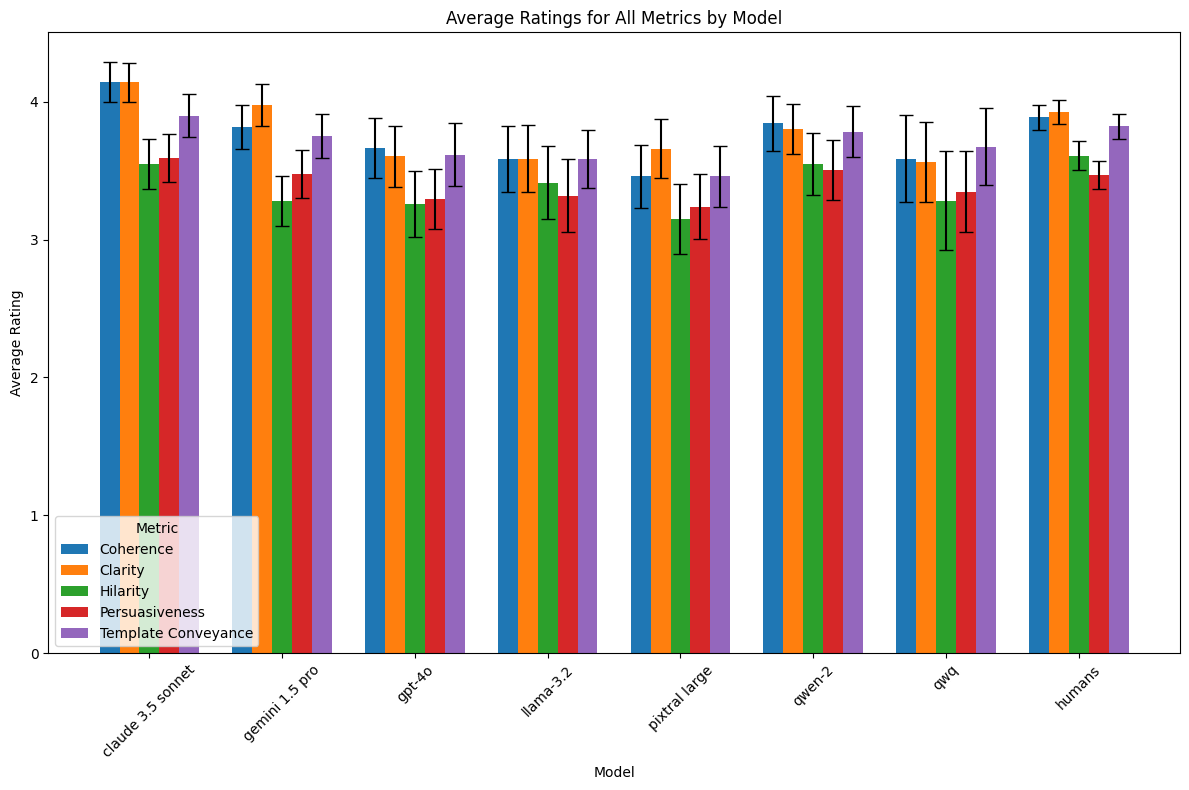

Combined plot saved as: ../results/postselection_data/overall_metrics_all_by_model_20250409_150635.png


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Mapping from Meme Identifier to Model Name ---
model_mapping = {
    "meme1": "claude 3.5 sonnet",
    "meme2": "gemini 1.5 pro",
    "meme3": "gpt-4o",
    "meme4": "llama-3.2",
    "meme5": "pixtral large",
    "meme6": "qwen-2",
    "meme7": "qwq",
    "meme8": "humans"
}

# Define the order for plotting
order = ["claude 3.5 sonnet", "gemini 1.5 pro", "gpt-4o",
         "llama-3.2", "pixtral large", "qwen-2", "qwq", "humans"]

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# Dictionary to store summary statistics for each metric and each model.
overall_stats = {}

for metric in metrics:
    overall_stats[metric] = {}
    # Select all columns that end with the current metric (e.g. "_coherence")
    metric_cols = [col for col in df_post.columns if re.search(rf"_{metric}$", col)]

    # Initialize a container for each model.
    for model in model_mapping.values():
        overall_stats[metric][model] = {"ratings": []}

    # Loop over each column for the current metric.
    for col in metric_cols:
        # Extract the meme identifier (e.g. "meme1" from "claim1_meme1_coherence")
        pattern = rf"claim\d+_(meme\d+)_{metric}"
        match = re.search(pattern, col)
        if match:
            meme_id = match.group(1)
            model_name = model_mapping.get(meme_id)
            if model_name:
                ratings = pd.to_numeric(df_post[col], errors='coerce').dropna().tolist()
                overall_stats[metric][model_name]["ratings"].extend(ratings)

    # Compute summary statistics (mean, count, std, standard error, and 95% CI half-width) for each model.
    for model in order:
        ratings_array = np.array(overall_stats[metric][model]["ratings"])
        count = len(ratings_array)
        if count > 0:
            mean_val = np.mean(ratings_array)
            std_val = np.std(ratings_array, ddof=1)
            se = std_val / np.sqrt(count)
            ci_half = 1.96 * se  # 95% confidence interval half-width
            overall_stats[metric][model].update({
                "mean": mean_val,
                "count": count,
                "std": std_val,
                "se": se,
                "ci_half": ci_half
            })
        else:
            overall_stats[metric][model].update({
                "mean": np.nan,
                "count": 0,
                "std": np.nan,
                "se": np.nan,
                "ci_half": np.nan
            })

# --- Prepare Data for a Grouped Bar Chart ---
# Create dictionaries for means and error bars (95% CI half-width) for each metric.
means_dict = {}
error_dict = {}
for metric in metrics:
    means_dict[metric] = [overall_stats[metric][model]["mean"] for model in order]
    error_dict[metric] = [overall_stats[metric][model]["ci_half"] for model in order]

# --- Plot a Grouped Bar Chart ---
x = np.arange(len(order))  # the label locations (one per model)
width = 0.15  # width of each bar

fig, ax = plt.subplots(figsize=(12,8))
metric_legend_labels = {
    "coherence": "Coherence",
    "clarity": "Clarity",
    "hilarity": "Hilarity",
    "persuasiveness": "Persuasiveness",
    "template_conveyance": "Template Conveyance"
}
for i, metric in enumerate(metrics):
    # Offset each metric's bars so that they're grouped for each model.
    ax.bar(x + i*width - (width*(len(metrics)-1))/2, means_dict[metric], width,
           yerr=error_dict[metric], capsize=5, label=metric_legend_labels[metric]) # Use the dictionary for the label

ax.set_xticks(x)
ax.set_xticklabels(order, rotation=45)
ax.set_xlabel("Model")
ax.set_ylabel("Average Rating")
ax.set_title("Average Ratings for All Metrics by Model")
ax.legend(title="Metric")
plt.tight_layout()

# Save the plot to the plots/postselection_data directory with a timestamp.
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/overall_metrics_all_by_model_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

print("Combined plot saved as:", plot_filename)

# Average of the averages per generator

Overall Average Ratings (aggregated across all metrics) by Model:
claude 3.5 sonnet: 3.87 (n = 700), 95% CI [3.79, 3.94]
gemini 1.5 pro: 3.66 (n = 720), 95% CI [3.58, 3.74]
gpt-4o: 3.49 (n = 405), 95% CI [3.39, 3.59]
llama-3.2: 3.50 (n = 375), 95% CI [3.39, 3.61]
pixtral large: 3.39 (n = 500), 95% CI [3.29, 3.50]
qwen-2: 3.70 (n = 485), 95% CI [3.61, 3.79]
qwq: 3.49 (n = 230), 95% CI [3.35, 3.63]
human baseline: 3.74 (n = 2130), 95% CI [3.70, 3.79]


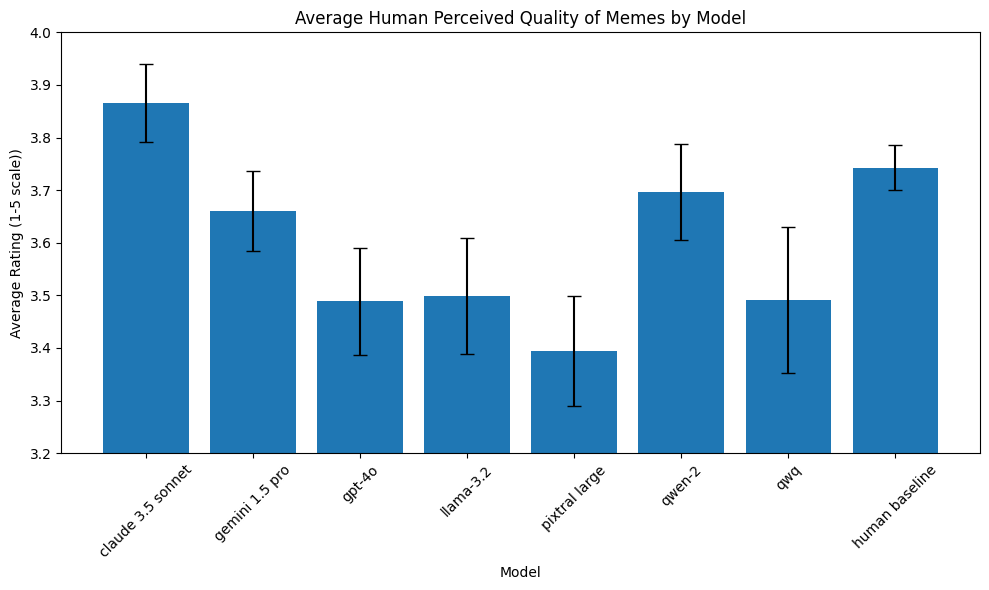

Plot saved as: ../results/postselection_data/overall_avg_by_model_20250410_150400.png


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Mapping from Meme Identifier to Model Name ---
model_mapping = {
    "meme1": "claude 3.5 sonnet",
    "meme2": "gemini 1.5 pro",
    "meme3": "gpt-4o",
    "meme4": "llama-3.2",
    "meme5": "pixtral large",
    "meme6": "qwen-2",
    "meme7": "qwq",
    "meme8": "human baseline"
}

# Define the order for plotting
order = ["claude 3.5 sonnet", "gemini 1.5 pro", "gpt-4o", 
         "llama-3.2", "pixtral large", "qwen-2", "qwq", "human baseline"]

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Aggregate Ratings Across All Metrics per Model ---
aggregated_ratings = {model: [] for model in order}

# Loop through each metric and add its ratings per model
for metric in metrics:
    # Find columns that end with the current metric (e.g., "_coherence")
    metric_cols = [col for col in df_post.columns if re.search(rf"_{metric}$", col)]
    for col in metric_cols:
        # Use regex to extract the meme identifier (e.g., "meme1" from "claim1_meme1_coherence")
        pattern = rf"claim\d+_(meme\d+)_{metric}"
        match = re.search(pattern, col)
        if match:
            meme_id = match.group(1)
            model_name = model_mapping.get(meme_id)
            if model_name:
                # Convert the column to numeric, drop NaNs, and extend the list
                ratings = pd.to_numeric(df_post[col], errors='coerce').dropna().tolist()
                aggregated_ratings[model_name].extend(ratings)

# --- Compute Overall Summary Statistics per Model ---
overall_stats = {}
for model in order:
    ratings_array = np.array(aggregated_ratings[model])
    count = len(ratings_array)
    if count > 0:
        mean_val = np.mean(ratings_array)
        std_val = np.std(ratings_array, ddof=1)
        se = std_val / np.sqrt(count)
        ci_half = 1.96 * se  # 95% CI half-width
        lower_bound = mean_val - ci_half
        upper_bound = mean_val + ci_half
        overall_stats[model] = {
            "mean": mean_val,
            "count": count,
            "std": std_val,
            "se": se,
            "ci_half": ci_half,
            "ci_lower": lower_bound,
            "ci_upper": upper_bound
        }
    else:
        overall_stats[model] = {
            "mean": np.nan,
            "count": 0,
            "std": np.nan,
            "se": np.nan,
            "ci_half": np.nan,
            "ci_lower": np.nan,
            "ci_upper": np.nan
        }

# --- Print Detailed Text Output with Confidence Intervals ---
print("Overall Average Ratings (aggregated across all metrics) by Model:")
for model in order:
    stats_dict = overall_stats[model]
    if stats_dict["count"] > 0:
        print(f"{model}: {stats_dict['mean']:.2f} (n = {stats_dict['count']}), 95% CI [{stats_dict['ci_lower']:.2f}, {stats_dict['ci_upper']:.2f}]")
    else:
        print(f"{model}: No data available.")

# --- Plot a Single Bar per Model ---
means = [overall_stats[model]["mean"] for model in order]
error_bars = [overall_stats[model]["ci_half"] for model in order]

plt.figure(figsize=(10,6))
plt.bar(order, means, yerr=error_bars, capsize=5)
plt.xlabel("Model")
plt.ylabel("Average Rating (1-5 scale))")
plt.title("Average Human Perceived Quality of Memes by Model")
plt.xticks(rotation=45)
# Zoom in the y-axis to the relevant range on the 1 to 5 scale
plt.ylim(3.2, 4.0)
plt.tight_layout()

# Save the plot to the plots/postselection_data directory with a timestamp.
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/overall_avg_by_model_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

print("Plot saved as:", plot_filename)

# Overall rejection reasons

Rejection Reasons Frequencies:
The memes weren't well-crafted          137
I disagree with the memes' positions     20
I found the memes to be offensive         5
Others                                   49
Name: count, dtype: int64


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_77746/4164200020.py:14: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  rejection_series = df_post[rejection_cols].stack(dropna=True).reset_index(drop=True)


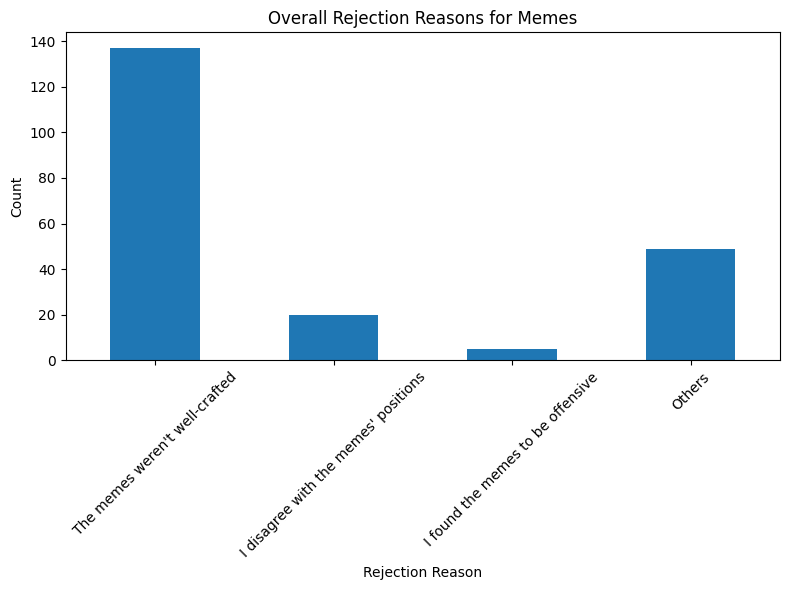

Plot saved as: ../results/postselection_data/rejection_reasons_20250409_151305.png


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Extract Rejection Reason Columns ---
# These columns are assumed to be named like "claimX_none_rejection_reasons"
rejection_cols = [col for col in df_post.columns if re.search(r"claim\d+_none_rejection_reasons", col)]

# Stack all rejection reason responses into one Series (dropping missing values)
rejection_series = df_post[rejection_cols].stack(dropna=True).reset_index(drop=True)

# --- Define the Expected Options ---
option1 = "The memes weren't well-crafted"
option2 = "I disagree with the memes' positions"
option3 = "I found the memes to be offensive"

# --- Recode the Rejection Reasons ---
def recode_reason(reason):
    # Remove extra whitespace
    reason_clean = reason.strip()
    if reason_clean == option1:
        return option1
    elif reason_clean == option2:
        return option2
    elif reason_clean == option3:
        return option3
    else:
        return "Others"

# Apply the recoding function to the series
rejection_series_recode = rejection_series.apply(recode_reason)

# --- Count the Frequencies of Each Category ---
counts = rejection_series_recode.value_counts()

# Ensure the order: option1, option2, option3, then "Others"
ordered_categories = [option1, option2, option3, "Others"]
counts = counts.reindex(ordered_categories).fillna(0).astype(int)

# Print the frequency counts
print("Rejection Reasons Frequencies:")
print(counts)

# --- Plot the Overall Rejection Reasons ---
plt.figure(figsize=(8,6))
counts.plot(kind='bar')
plt.xlabel("Rejection Reason")
plt.ylabel("Count")
plt.title("Overall Rejection Reasons for Memes")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot with a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/rejection_reasons_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

print("Plot saved as:", plot_filename)

# Averages the of the metrics of the none meme ratings

Overall None Option Ratings by Metric:
Coherence: 1.83 (n = 211)
Clarity: 2.30 (n = 211)
Hilarity: 1.49 (n = 211)
Persuasiveness: 1.63 (n = 211)
Template_conveyance: 2.26 (n = 211)


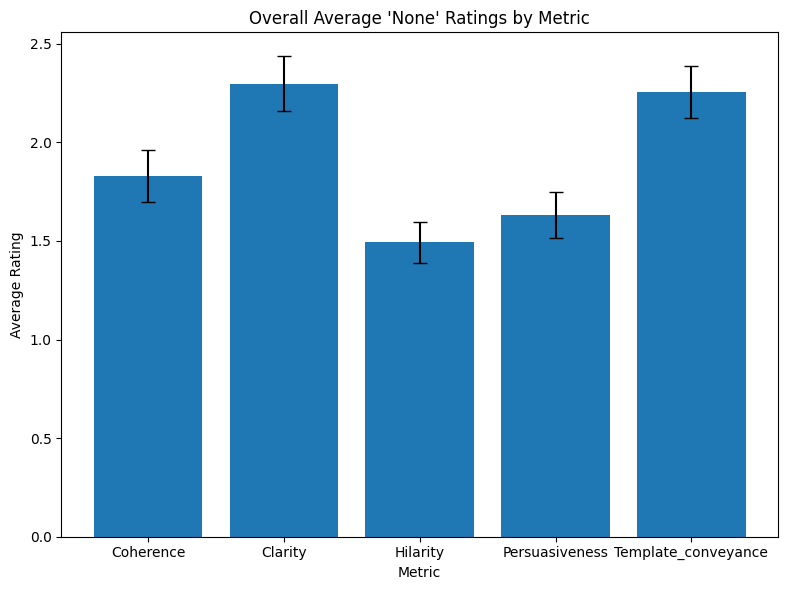

Plot saved as: ../results/postselection_data/none_option_metrics_20250409_151316.png


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# Dictionary to store overall stats for the none ratings per metric
none_stats = {}

for metric in metrics:
    # Find columns that match the pattern "claimX_none_{metric}"
    pattern = rf"claim\d+_none_{metric}$"
    cols = [col for col in df_post.columns if re.search(pattern, col)]
    if len(cols) > 0:
        # Concatenate all ratings from these columns into one Series
        all_ratings = pd.concat([pd.to_numeric(df_post[col], errors='coerce').dropna() for col in cols])
        avg = all_ratings.mean()
        count = all_ratings.count()
        std = all_ratings.std(ddof=1)
        se = std / np.sqrt(count)
        ci_half = 1.96 * se  # 95% confidence interval half-width
        none_stats[metric] = {"mean": avg, "count": count, "std": std, "se": se, "ci_half": ci_half}
    else:
        none_stats[metric] = {"mean": np.nan, "count": 0, "std": np.nan, "se": np.nan, "ci_half": np.nan}

# --- Print the Summary Statistics ---
print("Overall None Option Ratings by Metric:")
for metric in metrics:
    stats = none_stats[metric]
    print(f"{metric.capitalize()}: {stats['mean']:.2f} (n = {stats['count']})")

# --- Plot the Results ---
# Create a bar plot with one bar per metric
x_labels = [metric.capitalize() for metric in metrics]
x = np.arange(len(metrics))
means = [none_stats[metric]["mean"] for metric in metrics]
error_bars = [none_stats[metric]["ci_half"] for metric in metrics]

plt.figure(figsize=(8,6))
plt.bar(x, means, yerr=error_bars, capsize=5)
plt.xticks(x, x_labels)
plt.xlabel("Metric")
plt.ylabel("Average Rating")
plt.title("Overall Average 'None' Ratings by Metric")
plt.tight_layout()

# Save the plot with a timestamp in the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/none_option_metrics_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

print("Plot saved as:", plot_filename)

# Averages of the metrics per claim

In [30]:
import pandas as pd
import numpy as np
import re

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest (excluding "none" columns) ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Identify Unique Claim Identifiers Excluding "none" Columns ---
# Use a regex pattern that matches the beginning of the string to extract the claim id.
claim_pattern = r"^(claim\d+)_"
claims = sorted({re.match(claim_pattern, col).group(1)
                 for col in df_post.columns
                 if re.match(claim_pattern, col) and "none" not in col},
                key=lambda x: int(re.search(r"\d+", x).group()))

print("Average Ratings (excluding 'none' columns) for each claim:\n")

# --- Compute and Print the Average for Each Claim ---
for claim in claims:
    # Use a regex to ensure we only select columns that start exactly with the claim id followed by an underscore.
    metric_cols = [col for col in df_post.columns 
                   if re.match(rf"^{claim}_", col) 
                   and "none" not in col 
                   and any(col.endswith(metric) for metric in metrics)]
    
    # Concatenate ratings from these columns, converting to numeric and dropping NaN values.
    all_ratings = pd.concat([pd.to_numeric(df_post[col], errors='coerce').dropna() for col in metric_cols])
    
    if len(all_ratings) > 0:
        avg_rating = all_ratings.mean()
        print(f"{claim}: {avg_rating:.2f} (n = {len(all_ratings)})")
    else:
        print(f"{claim}: No ratings available")

Average Ratings (excluding 'none' columns) for each claim:

claim1: 3.96 (n = 525)
claim2: 3.60 (n = 485)
claim3: 3.67 (n = 485)
claim4: 3.81 (n = 455)
claim5: 3.58 (n = 465)
claim6: 3.81 (n = 510)
claim7: 3.68 (n = 470)
claim8: 3.66 (n = 475)
claim9: 3.53 (n = 425)
claim10: 3.49 (n = 405)
claim11: 3.61 (n = 445)
claim12: 3.50 (n = 400)


# Corr between coherence and clarity

In [38]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Select Coherence Columns Excluding "none" Columns ---
coherence_cols = [col for col in df_post.columns if col.endswith("_coherence") and "none" not in col]

# Lists to store paired ratings for coherence and clarity
coherence_vals = []
clarity_vals = []

# --- Loop Over Coherence Columns and Find Matching Clarity Columns ---
for col in coherence_cols:
    # Build the corresponding clarity column name by replacing "_coherence" with "_clarity"
    clarity_col = col.replace("_coherence", "_clarity")
    if clarity_col in df_post.columns:
        # Convert both columns to numeric
        coh = pd.to_numeric(df_post[col], errors='coerce')
        clar = pd.to_numeric(df_post[clarity_col], errors='coerce')
        # Only consider rows where both ratings are available
        valid_mask = coh.notna() & clar.notna()
        coherence_vals.extend(coh[valid_mask].tolist())
        clarity_vals.extend(clar[valid_mask].tolist())

# --- Compute Pearson and Spearman Correlations ---
if len(coherence_vals) > 0 and len(clarity_vals) > 0:
    pearson_corr, pearson_p = pearsonr(coherence_vals, clarity_vals)
    spearman_corr, spearman_p = spearmanr(coherence_vals, clarity_vals)
    
    print("Correlation between Coherence and Clarity Ratings (across all claims and participants):")
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
else:
    print("No valid paired ratings found for coherence and clarity.")

Correlation between Coherence and Clarity Ratings (across all claims and participants):
Pearson correlation coefficient: 0.694, p-value: 0.000
Spearman correlation coefficient: 0.700, p-value: 0.000


# Corr between coherence and hilarity

In [37]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Select Coherence Columns Excluding "none" Columns ---
coherence_cols = [col for col in df_post.columns if col.endswith("_coherence") and "none" not in col]

# Lists to store paired ratings for coherence and hilarity
coherence_vals = []
hilarity_vals = []

# --- Loop Over Coherence Columns and Find Matching Hilarity Columns ---
for col in coherence_cols:
    # Build the corresponding hilarity column name by replacing "_coherence" with "_hilarity"
    hilarity_col = col.replace("_coherence", "_hilarity")
    if hilarity_col in df_post.columns:
        # Convert both columns to numeric
        coh = pd.to_numeric(df_post[col], errors='coerce')
        hil = pd.to_numeric(df_post[hilarity_col], errors='coerce')
        # Only consider rows where both ratings are available
        valid_mask = coh.notna() & hil.notna()
        coherence_vals.extend(coh[valid_mask].tolist())
        hilarity_vals.extend(hil[valid_mask].tolist())

# --- Compute Pearson and Spearman Correlations ---
if len(coherence_vals) > 0 and len(hilarity_vals) > 0:
    pearson_corr, pearson_p = pearsonr(coherence_vals, hilarity_vals)
    spearman_corr, spearman_p = spearmanr(coherence_vals, hilarity_vals)
    
    print("Correlation between Coherence and Hilarity Ratings (across all claims and participants):")
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
else:
    print("No valid paired ratings found for coherence and hilarity.")

Correlation between Coherence and Hilarity Ratings (across all claims and participants):
Pearson correlation coefficient: 0.596, p-value: 0.000
Spearman correlation coefficient: 0.570, p-value: 0.000


# Corr coherence and persuasiveness

In [39]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Select Coherence Columns Excluding "none" Columns ---
coherence_cols = [col for col in df_post.columns if col.endswith("_coherence") and "none" not in col]

# Lists to store paired ratings for coherence and persuasiveness
coherence_vals = []
persuasiveness_vals = []

# --- Loop Over Coherence Columns and Find Matching Persuasiveness Columns ---
for col in coherence_cols:
    # Build the corresponding persuasiveness column name by replacing "_coherence" with "_persuasiveness"
    persuasiveness_col = col.replace("_coherence", "_persuasiveness")
    if persuasiveness_col in df_post.columns:
        # Convert both columns to numeric
        coh = pd.to_numeric(df_post[col], errors='coerce')
        pers = pd.to_numeric(df_post[persuasiveness_col], errors='coerce')
        # Only consider rows where both ratings are available
        valid_mask = coh.notna() & pers.notna()
        coherence_vals.extend(coh[valid_mask].tolist())
        persuasiveness_vals.extend(pers[valid_mask].tolist())

# --- Compute Pearson and Spearman Correlations ---
if len(coherence_vals) > 0 and len(persuasiveness_vals) > 0:
    pearson_corr, pearson_p = pearsonr(coherence_vals, persuasiveness_vals)
    spearman_corr, spearman_p = spearmanr(coherence_vals, persuasiveness_vals)
    
    print("Correlation between Coherence and Persuasiveness Ratings (across all claims and participants):")
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
else:
    print("No valid paired ratings found for coherence and persuasiveness.")

Correlation between Coherence and Persuasiveness Ratings (across all claims and participants):
Pearson correlation coefficient: 0.639, p-value: 0.000
Spearman correlation coefficient: 0.621, p-value: 0.000


# Corr coherence template conveyance

In [41]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Select Coherence Columns Excluding "none" Columns ---
coherence_cols = [col for col in df_post.columns if col.endswith("_coherence") and "none" not in col]

# Lists to store paired ratings for coherence and template_conveyance
coherence_vals = []
template_vals = []

# --- Loop Over Coherence Columns and Find Matching Template Conveyance Columns ---
for col in coherence_cols:
    # Build the corresponding template_conveyance column name by replacing "_coherence" with "_template_conveyance"
    template_col = col.replace("_coherence", "_template_conveyance")
    if template_col in df_post.columns:
        # Convert both columns to numeric
        coh = pd.to_numeric(df_post[col], errors='coerce')
        temp = pd.to_numeric(df_post[template_col], errors='coerce')
        # Only consider rows where both ratings are available
        valid_mask = coh.notna() & temp.notna()
        coherence_vals.extend(coh[valid_mask].tolist())
        template_vals.extend(temp[valid_mask].tolist())

# --- Compute Pearson and Spearman Correlations ---
if len(coherence_vals) > 0 and len(template_vals) > 0:
    pearson_corr, pearson_p = pearsonr(coherence_vals, template_vals)
    spearman_corr, spearman_p = spearmanr(coherence_vals, template_vals)
    
    print("Correlation between Coherence and Template Conveyance Ratings (across all claims and participants):")
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
else:
    print("No valid paired ratings found for coherence and template conveyance.")

Correlation between Coherence and Template Conveyance Ratings (across all claims and participants):
Pearson correlation coefficient: 0.694, p-value: 0.000
Spearman correlation coefficient: 0.691, p-value: 0.000


# Corr clarity and hilarity

In [42]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Select Clarity Columns Excluding "none" Columns ---
clarity_cols = [col for col in df_post.columns if col.endswith("_clarity") and "none" not in col]

# Lists to store paired ratings for clarity and hilarity
clarity_vals = []
hilarity_vals = []

# --- Loop Over Clarity Columns and Find Matching Hilarity Columns ---
for col in clarity_cols:
    # Construct the corresponding hilarity column by replacing "_clarity" with "_hilarity"
    hilarity_col = col.replace("_clarity", "_hilarity")
    if hilarity_col in df_post.columns:
        # Convert both columns to numeric values
        clar = pd.to_numeric(df_post[col], errors='coerce')
        hil = pd.to_numeric(df_post[hilarity_col], errors='coerce')
        # Only consider rows where both ratings are available
        valid_mask = clar.notna() & hil.notna()
        clarity_vals.extend(clar[valid_mask].tolist())
        hilarity_vals.extend(hil[valid_mask].tolist())

# --- Compute Pearson and Spearman Correlations ---
if len(clarity_vals) > 0 and len(hilarity_vals) > 0:
    pearson_corr, pearson_p = pearsonr(clarity_vals, hilarity_vals)
    spearman_corr, spearman_p = spearmanr(clarity_vals, hilarity_vals)
    
    print("Correlation between Clarity and Hilarity Ratings (across all claims and participants):")
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
else:
    print("No valid paired ratings found for clarity and hilarity.")


Correlation between Clarity and Hilarity Ratings (across all claims and participants):
Pearson correlation coefficient: 0.510, p-value: 0.000
Spearman correlation coefficient: 0.508, p-value: 0.000


# Corr clarity and persuasiveness

In [43]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Select Clarity Columns Excluding "none" Columns ---
clarity_cols = [col for col in df_post.columns if col.endswith("_clarity") and "none" not in col]

# Lists to store paired ratings for clarity and persuasiveness
clarity_vals = []
persuasiveness_vals = []

# --- Loop Over Clarity Columns and Find Matching Persuasiveness Columns ---
for col in clarity_cols:
    # Construct the corresponding persuasiveness column by replacing "_clarity" with "_persuasiveness"
    persuasiveness_col = col.replace("_clarity", "_persuasiveness")
    if persuasiveness_col in df_post.columns:
        # Convert both columns to numeric
        clar = pd.to_numeric(df_post[col], errors='coerce')
        pers = pd.to_numeric(df_post[persuasiveness_col], errors='coerce')
        # Only consider rows where both ratings are available
        valid_mask = clar.notna() & pers.notna()
        clarity_vals.extend(clar[valid_mask].tolist())
        persuasiveness_vals.extend(pers[valid_mask].tolist())

# --- Compute Pearson and Spearman Correlations ---
if len(clarity_vals) > 0 and len(persuasiveness_vals) > 0:
    pearson_corr, pearson_p = pearsonr(clarity_vals, persuasiveness_vals)
    spearman_corr, spearman_p = spearmanr(clarity_vals, persuasiveness_vals)
    
    print("Correlation between Clarity and Persuasiveness Ratings (across all claims and participants):")
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
else:
    print("No valid paired ratings found for clarity and persuasiveness.")


Correlation between Clarity and Persuasiveness Ratings (across all claims and participants):
Pearson correlation coefficient: 0.615, p-value: 0.000
Spearman correlation coefficient: 0.619, p-value: 0.000


# Corr clarity and template conveyance

In [44]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Select Clarity Columns Excluding "none" Columns ---
clarity_cols = [col for col in df_post.columns if col.endswith("_clarity") and "none" not in col]

# Lists to store paired ratings for clarity and template conveyance
clarity_vals = []
template_vals = []

# --- Loop Over Clarity Columns and Find Matching Template Conveyance Columns ---
for col in clarity_cols:
    # Construct the corresponding template conveyance column by replacing "_clarity" with "_template_conveyance"
    template_col = col.replace("_clarity", "_template_conveyance")
    if template_col in df_post.columns:
        # Convert both columns to numeric values
        clar = pd.to_numeric(df_post[col], errors='coerce')
        temp = pd.to_numeric(df_post[template_col], errors='coerce')
        # Only consider rows where both ratings are available
        valid_mask = clar.notna() & temp.notna()
        clarity_vals.extend(clar[valid_mask].tolist())
        template_vals.extend(temp[valid_mask].tolist())

# --- Compute Pearson and Spearman Correlations ---
if len(clarity_vals) > 0 and len(template_vals) > 0:
    pearson_corr, pearson_p = pearsonr(clarity_vals, template_vals)
    spearman_corr, spearman_p = spearmanr(clarity_vals, template_vals)
    
    print("Correlation between Clarity and Template Conveyance Ratings (across all claims and participants):")
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
else:
    print("No valid paired ratings found for clarity and template conveyance.")

Correlation between Clarity and Template Conveyance Ratings (across all claims and participants):
Pearson correlation coefficient: 0.650, p-value: 0.000
Spearman correlation coefficient: 0.648, p-value: 0.000


# Corr hilarity and persuasiveness

In [45]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Select Hilarity Columns Excluding "none" Columns ---
hilarity_cols = [col for col in df_post.columns if col.endswith("_hilarity") and "none" not in col]

# Lists to store paired ratings for hilarity and persuasiveness
hilarity_vals = []
persuasiveness_vals = []

# --- Loop Over Hilarity Columns and Find Matching Persuasiveness Columns ---
for col in hilarity_cols:
    # Construct the corresponding persuasiveness column by replacing "_hilarity" with "_persuasiveness"
    persuasiveness_col = col.replace("_hilarity", "_persuasiveness")
    if persuasiveness_col in df_post.columns:
        # Convert both columns to numeric values
        hil = pd.to_numeric(df_post[col], errors='coerce')
        pers = pd.to_numeric(df_post[persuasiveness_col], errors='coerce')
        # Only consider rows where both ratings are available
        valid_mask = hil.notna() & pers.notna()
        hilarity_vals.extend(hil[valid_mask].tolist())
        persuasiveness_vals.extend(pers[valid_mask].tolist())

# --- Compute Pearson and Spearman Correlations ---
if len(hilarity_vals) > 0 and len(persuasiveness_vals) > 0:
    pearson_corr, pearson_p = pearsonr(hilarity_vals, persuasiveness_vals)
    spearman_corr, spearman_p = spearmanr(hilarity_vals, persuasiveness_vals)
    
    print("Correlation between Hilarity and Persuasiveness Ratings (across all claims and participants):")
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
else:
    print("No valid paired ratings found for hilarity and persuasiveness.")


Correlation between Hilarity and Persuasiveness Ratings (across all claims and participants):
Pearson correlation coefficient: 0.640, p-value: 0.000
Spearman correlation coefficient: 0.626, p-value: 0.000


# Corr hilarity and template conveyance

In [46]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Select Hilarity Columns Excluding "none" Columns ---
hilarity_cols = [col for col in df_post.columns if col.endswith("_hilarity") and "none" not in col]

# Lists to store paired ratings for hilarity and template conveyance
hilarity_vals = []
template_vals = []

# --- Loop Over Hilarity Columns and Find Matching Template Conveyance Columns ---
for col in hilarity_cols:
    # Construct the corresponding template conveyance column by replacing "_hilarity" with "_template_conveyance"
    template_col = col.replace("_hilarity", "_template_conveyance")
    if template_col in df_post.columns:
        # Convert both columns to numeric values
        hil = pd.to_numeric(df_post[col], errors='coerce')
        temp = pd.to_numeric(df_post[template_col], errors='coerce')
        # Only consider rows where both ratings are available
        valid_mask = hil.notna() & temp.notna()
        hilarity_vals.extend(hil[valid_mask].tolist())
        template_vals.extend(temp[valid_mask].tolist())

# --- Compute Pearson and Spearman Correlations ---
if len(hilarity_vals) > 0 and len(template_vals) > 0:
    pearson_corr, pearson_p = pearsonr(hilarity_vals, template_vals)
    spearman_corr, spearman_p = spearmanr(hilarity_vals, template_vals)
    
    print("Correlation between Hilarity and Template Conveyance Ratings (across all claims and participants):")
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
else:
    print("No valid paired ratings found for hilarity and template conveyance.")


Correlation between Hilarity and Template Conveyance Ratings (across all claims and participants):
Pearson correlation coefficient: 0.575, p-value: 0.000
Spearman correlation coefficient: 0.561, p-value: 0.000


# Corr persuasiveness and template conveyance

In [47]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Select Persuasiveness Columns Excluding "none" Columns ---
persuasiveness_cols = [col for col in df_post.columns 
                        if col.endswith("_persuasiveness") and "none" not in col]

# Lists to store paired ratings for persuasiveness and template conveyance
persuasiveness_vals = []
template_vals = []

# --- Loop Over Persuasiveness Columns and Find Matching Template Conveyance Columns ---
for col in persuasiveness_cols:
    # Construct the corresponding template conveyance column name by replacing "_persuasiveness" with "_template_conveyance"
    template_col = col.replace("_persuasiveness", "_template_conveyance")
    if template_col in df_post.columns:
        pers = pd.to_numeric(df_post[col], errors='coerce')
        temp = pd.to_numeric(df_post[template_col], errors='coerce')
        # Only consider rows where both ratings are available
        valid_mask = pers.notna() & temp.notna()
        persuasiveness_vals.extend(pers[valid_mask].tolist())
        template_vals.extend(temp[valid_mask].tolist())

# --- Compute Pearson and Spearman Correlations ---
if len(persuasiveness_vals) > 0 and len(template_vals) > 0:
    pearson_corr, pearson_p = pearsonr(persuasiveness_vals, template_vals)
    spearman_corr, spearman_p = spearmanr(persuasiveness_vals, template_vals)
    
    print("Correlation between Persuasiveness and Template Conveyance Ratings (across all claims and participants):")
    print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
else:
    print("No valid paired ratings found for persuasiveness and template conveyance.")


Correlation between Persuasiveness and Template Conveyance Ratings (across all claims and participants):
Pearson correlation coefficient: 0.645, p-value: 0.000
Spearman correlation coefficient: 0.637, p-value: 0.000


# Corr meme effectiveness and average of the metrics

In [50]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Data ---
# Preselection data contains overall effectiveness ratings.
df_pre = pd.read_csv("../data/preselection_meme_ratings.csv")
# Postselection data contains ratings for individual metrics.
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Compute Overall Effectiveness from Preselection Data ---
# Select columns matching the pattern "claim\d+_meme\d+$" (ignoring feedback or pref columns)
pre_rating_cols = [col for col in df_pre.columns if re.match(r"claim\d+_meme\d+$", col)]
df_pre["overall_effectiveness"] = df_pre[pre_rating_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# --- Compute Per-Participant Averages for Each Metric in Postselection Data ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]
for metric in metrics:
    metric_cols = [col for col in df_post.columns 
                   if re.match(rf"claim\d+_meme\d+_{metric}$", col) and "none" not in col]
    if len(metric_cols) > 0:
        df_post[f"avg_{metric}"] = df_post[metric_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)
    else:
        df_post[f"avg_{metric}"] = np.nan

# --- Merge the Two Datasets on prolific_id ---
merged = pd.merge(df_pre[["prolific_id", "overall_effectiveness"]],
                  df_post[["prolific_id"] + [f"avg_{m}" for m in metrics]],
                  on="prolific_id", how="inner")

# --- Compute Correlations for Each Metric ---
results = {}
for metric in metrics:
    col_name = f"avg_{metric}"
    # Create a mask that excludes rows with NaN or infinite values in either overall_effectiveness or the metric column.
    valid_mask = (merged["overall_effectiveness"].notna() & 
                  merged[col_name].notna() & 
                  np.isfinite(merged["overall_effectiveness"]) &
                  np.isfinite(merged[col_name]))
    x = merged.loc[valid_mask, "overall_effectiveness"]
    y = merged.loc[valid_mask, col_name]
    
    if len(x) > 0 and len(y) > 0:
        pearson_corr, pearson_p = pearsonr(x, y)
        spearman_corr, spearman_p = spearmanr(x, y)
        results[metric] = {"pearson_corr": pearson_corr, "pearson_p": pearson_p,
                           "spearman_corr": spearman_corr, "spearman_p": spearman_p}
    else:
        results[metric] = {"pearson_corr": np.nan, "pearson_p": np.nan,
                           "spearman_corr": np.nan, "spearman_p": np.nan}

# --- Print the Correlation Results ---
for metric, res in results.items():
    print(f"Correlation between Overall Effectiveness and {metric.capitalize()} Rating:")
    print(f"  Pearson correlation coefficient: {res['pearson_corr']:.3f} (p = {res['pearson_p']:.3f})")
    print(f"  Spearman correlation coefficient: {res['spearman_corr']:.3f} (p = {res['spearman_p']:.3f})\n")

Correlation between Overall Effectiveness and Coherence Rating:
  Pearson correlation coefficient: 0.504 (p = 0.000)
  Spearman correlation coefficient: 0.434 (p = 0.000)

Correlation between Overall Effectiveness and Clarity Rating:
  Pearson correlation coefficient: 0.360 (p = 0.000)
  Spearman correlation coefficient: 0.288 (p = 0.002)

Correlation between Overall Effectiveness and Hilarity Rating:
  Pearson correlation coefficient: 0.665 (p = 0.000)
  Spearman correlation coefficient: 0.636 (p = 0.000)

Correlation between Overall Effectiveness and Persuasiveness Rating:
  Pearson correlation coefficient: 0.583 (p = 0.000)
  Spearman correlation coefficient: 0.535 (p = 0.000)

Correlation between Overall Effectiveness and Template_conveyance Rating:
  Pearson correlation coefficient: 0.405 (p = 0.000)
  Spearman correlation coefficient: 0.356 (p = 0.000)



# Age group and average metrics

In [58]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Compute Overall Average Rating per Participant (excluding "none" columns) ---
# We assume that columns matching the pattern "claimX_memeY_metric" represent the ratings.
pattern = r"claim\d+_meme\d+_(coherence|clarity|hilarity|persuasiveness|template_conveyance)$"
metric_cols = [col for col in post.columns if re.search(pattern, col) and "none" not in col]
post["avg_rating"] = post[metric_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# --- Merge with Demographics ---
merged = pd.merge(demographics, post[["prolific_id", "avg_rating"]], on="prolific_id", how="inner")

# --- Filter Out Rows where age_group is "I prefer not to answer" ---
merged = merged[merged["age_group"] != "I prefer not to answer"]

# --- Recode Age Group ---
age_mapping = {
    "18-25 years old": 1,
    "26-35 years old": 2,
    "36-50 years old": 3,
    "Over 50 years old": 4
}
merged["age_group_numeric"] = merged["age_group"].map(age_mapping)

# --- Debugging: Check for NaN or Inf in avg_rating ---
print("Total number of participants in merged data:", len(merged))
print("\nMerged Data (selected columns):")
print(merged[["prolific_id", "age_group", "avg_rating"]].head(15))  # Print first 15 rows for inspection

# Identify rows where avg_rating is NaN or Inf
invalid_mask = ~(merged["avg_rating"].notna() & np.isfinite(merged["avg_rating"]))
invalid_rows = merged[invalid_mask]
print("\nRows with invalid avg_rating (NaN or Inf):")
print(invalid_rows[["prolific_id", "age_group", "avg_rating"]])

# --- Prepare Data for Correlation ---
x = merged["age_group_numeric"]
y = merged["avg_rating"]

# Remove any rows where x or y is NaN or infinite
valid_mask = x.notna() & y.notna() & np.isfinite(x) & np.isfinite(y)
x_valid = x[valid_mask]
y_valid = y[valid_mask]

print("\nDescriptive statistics for valid age_group values:")
print(x_valid.describe())
print("\nDescriptive statistics for valid overall effectiveness ratings:")
print(y_valid.describe())
print(f"\nTotal number of valid rows used for correlation: {len(x_valid)}\n")

# --- Compute Pearson and Spearman Correlations ---
pearson_corr, pearson_p = pearsonr(x_valid, y_valid)
spearman_corr, spearman_p = spearmanr(x_valid, y_valid)

print("Correlation between Age Group and Overall Average Rating (across all metrics):")
print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Total number of participants in merged data: 110

Merged Data (selected columns):
                 prolific_id          age_group  avg_rating
0   675d4aeb825ae0ad1dab882d    18-25 years old    3.033333
1   6739bf49b52d33ee1e065f91  Over 50 years old    3.750000
2   671e9d93e055c47ec6932e61    26-35 years old    3.400000
3   665f1309c64c2a4f4ea7bb91    26-35 years old    3.266667
4   5c09a1171907db0001602601    26-35 years old    2.900000
5   673ca17dfccbd09d5e019b3f  Over 50 years old    1.450000
6   6554d544abc4fe9a127c9d02    18-25 years old    3.355556
7   677d9832cf3ff620ad5687c0    26-35 years old    3.066667
8   6627b43d7e025aea82150f09    36-50 years old    3.057143
9   67710194340c0b6caf4469d9    26-35 years old    4.550000
10  673b4da65ea71e981a4244b8    18-25 years old    3.254545
11  5bd7cde93dac81000124bb7b    26-35 years old    3.800000
12  672d8eecfb569eec7b2ab5bd  Over 50 years old    3.700000
13  669c875560ed8446c3765679    26-35 years old    3.783333
14  6680af9634b04a

# Corr age agroup per metric

In [59]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Compute Per-Participant Average for Each Metric (excluding "none" columns) ---
# For each metric, select columns matching the pattern "claim\d+_meme\d+_{metric}" and compute the row-wise average.
for metric in metrics:
    # Regex pattern: we ensure that the column ends exactly with _{metric} and does not contain "none"
    metric_cols = [col for col in post.columns 
                   if re.search(rf"^claim\d+_meme\d+_{metric}$", col) and "none" not in col]
    # Compute the average for this metric
    post[f"avg_{metric}"] = post[metric_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# --- Merge the Averages with Demographics ---
# We only need the prolific_id and the computed metric averages.
metric_cols_avg = [f"avg_{metric}" for metric in metrics]
merged = pd.merge(demographics, post[["prolific_id"] + metric_cols_avg], on="prolific_id", how="inner")

# --- Filter Out Rows Where age_group is "I prefer not to answer" ---
merged = merged[merged["age_group"] != "I prefer not to answer"]

# --- Recode Age Group ---
age_mapping = {
    "18-25 years old": 1,
    "26-35 years old": 2,
    "36-50 years old": 3,
    "Over 50 years old": 4
}
merged["age_group_numeric"] = merged["age_group"].map(age_mapping)

# --- Debugging: Print Descriptive Statistics for Age and Each Metric ---
print("Descriptive Statistics for Age Group (numeric):")
print(merged["age_group_numeric"].describe(), "\n")

for metric in metrics:
    col = f"avg_{metric}"
    print(f"Descriptive Statistics for {metric.capitalize()} (avg):")
    print(merged[col].describe(), "\n")

# --- Compute and Print Correlations for Each Metric ---
print("Correlation between Age Group and Each Metric:\n")
results = {}
for metric in metrics:
    col = f"avg_{metric}"
    x = merged["age_group_numeric"]
    y = merged[col]
    # Remove rows with NaN or infinite values
    valid_mask = x.notna() & y.notna() & np.isfinite(x) & np.isfinite(y)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    
    if len(x_valid) > 0 and len(y_valid) > 0:
        pearson_corr, pearson_p = pearsonr(x_valid, y_valid)
        spearman_corr, spearman_p = spearmanr(x_valid, y_valid)
        results[metric] = {
            "pearson_corr": pearson_corr, "pearson_p": pearson_p,
            "spearman_corr": spearman_corr, "spearman_p": spearman_p
        }
        print(f"{metric.capitalize()}:")
        print(f"  Pearson: {pearson_corr:.3f} (p = {pearson_p:.3f})")
        print(f"  Spearman: {spearman_corr:.3f} (p = {spearman_p:.3f})\n")
    else:
        print(f"{metric.capitalize()}: Insufficient valid data.\n")


Descriptive Statistics for Age Group (numeric):
count    110.000000
mean       2.463636
std        1.010743
min        1.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: age_group_numeric, dtype: float64 

Descriptive Statistics for Coherence (avg):
count    109.000000
mean       3.797378
std        0.705311
min        1.416667
25%        3.444444
50%        3.916667
75%        4.250000
max        5.000000
Name: avg_coherence, dtype: float64 

Descriptive Statistics for Clarity (avg):
count    109.000000
mean       3.858851
std        0.668019
min        1.333333
25%        3.428571
50%        4.000000
75%        4.333333
max        5.000000
Name: avg_clarity, dtype: float64 

Descriptive Statistics for Hilarity (avg):
count    109.000000
mean       3.416039
std        0.826806
min        1.416667
25%        2.818182
50%        3.454545
75%        4.000000
max        5.000000
Name: avg_hilarity, dtype: float64 

Descriptive Statistics for Per

# Corr education level average metrics

In [60]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Compute Per-Participant Average for Each Metric (excluding "none" columns) ---
for metric in metrics:
    # Use a regex that matches columns like "claimX_memeY_metric" exactly
    pattern = rf"^claim\d+_meme\d+_{metric}$"
    metric_cols = [col for col in post.columns if re.search(pattern, col) and "none" not in col]
    # Compute the row-wise average across the selected columns and store in a new column (e.g. avg_coherence)
    post[f"avg_{metric}"] = post[metric_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# --- Merge the Averages with Demographics ---
metric_cols_avg = [f"avg_{metric}" for metric in metrics]
merged = pd.merge(demographics, post[["prolific_id"] + metric_cols_avg], on="prolific_id", how="inner")

# --- Filter Out Rows Where Education Level is "I prefer not to answer" ---
merged = merged[merged["education_level"] != "I prefer not to answer"]

# --- Recode Education Level ---
education_mapping = {
    "Elementary education": 1,
    "High school diploma or equivalent": 2,
    "Bachelor's degree": 3,
    "Master's degree": 4,
    "Doctoral degree (PhD)": 5
}
merged["education_level_numeric"] = merged["education_level"].map(education_mapping)

# --- Compute and Print Correlations for Each Metric ---
print("Correlation between Education Level and Each Metric Average:\n")
results = {}
for metric in metrics:
    col = f"avg_{metric}"
    x = merged["education_level_numeric"]
    y = merged[col]
    # Remove any rows with NaN or infinite values
    valid_mask = x.notna() & y.notna() & np.isfinite(x) & np.isfinite(y)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    
    if len(x_valid) > 0 and len(y_valid) > 0:
        pearson_corr, pearson_p = pearsonr(x_valid, y_valid)
        spearman_corr, spearman_p = spearmanr(x_valid, y_valid)
        results[metric] = {"pearson_corr": pearson_corr, "pearson_p": pearson_p,
                           "spearman_corr": spearman_corr, "spearman_p": spearman_p}
        print(f"{metric.capitalize()}:")
        print(f"  Pearson correlation: {pearson_corr:.3f} (p = {pearson_p:.3f})")
        print(f"  Spearman correlation: {spearman_corr:.3f} (p = {spearman_p:.3f})\n")
    else:
        print(f"{metric.capitalize()}: Not enough valid data.\n")

Correlation between Education Level and Each Metric Average:

Coherence:
  Pearson correlation: 0.099 (p = 0.306)
  Spearman correlation: 0.078 (p = 0.420)

Clarity:
  Pearson correlation: 0.044 (p = 0.648)
  Spearman correlation: 0.031 (p = 0.752)

Hilarity:
  Pearson correlation: 0.207 (p = 0.031)
  Spearman correlation: 0.232 (p = 0.015)

Persuasiveness:
  Pearson correlation: 0.072 (p = 0.455)
  Spearman correlation: 0.102 (p = 0.293)

Template_conveyance:
  Pearson correlation: 0.025 (p = 0.800)
  Spearman correlation: 0.047 (p = 0.624)



# Corr meme fam per metric

In [61]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Compute Per-Participant Average for Each Metric (excluding "none" columns) ---
# We assume that the columns matching "claimX_memeY_metric" are the generated meme ratings.
for metric in metrics:
    # Use a regex pattern that matches columns like "claimX_memeY_metric" exactly and exclude any columns with "none"
    pattern = rf"^claim\d+_meme\d+_{metric}$"
    metric_cols = [col for col in post.columns if re.search(pattern, col) and "none" not in col]
    post[f"avg_{metric}"] = post[metric_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)

# --- Merge the Averages with Demographics ---
metric_cols_avg = [f"avg_{metric}" for metric in metrics]
merged = pd.merge(demographics, post[["prolific_id"] + metric_cols_avg], on="prolific_id", how="inner")

# --- Filter Out Rows Where meme_familiarity is "I prefer not to answer" ---
merged = merged[merged["meme_familiarity"] != "I prefer not to answer"]

# --- Recode Meme Familiarity ---
familiarity_mapping = {
    "Not familiar at all": 1,
    "Slightly familiar": 2,
    "Moderately familiar": 3,
    "Very familiar": 4,
    "Extremely familiar": 5
}
merged["meme_familiarity_numeric"] = merged["meme_familiarity"].map(familiarity_mapping)

# --- Debugging: Print Descriptive Statistics ---
print("Descriptive Statistics for Meme Familiarity (numeric):")
print(merged["meme_familiarity_numeric"].describe(), "\n")
for metric in metrics:
    col = f"avg_{metric}"
    print(f"Descriptive Statistics for {metric.capitalize()} (avg):")
    print(merged[col].describe(), "\n")
print(f"Total number of participants considered: {len(merged)}\n")

# --- Compute and Print Correlations for Each Metric ---
print("Correlation between Meme Familiarity and Each Metric:\n")
results = {}
for metric in metrics:
    col = f"avg_{metric}"
    x = merged["meme_familiarity_numeric"]
    y = merged[col]
    # Remove rows where x or y is NaN or infinite
    valid_mask = x.notna() & y.notna() & np.isfinite(x) & np.isfinite(y)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    
    if len(x_valid) > 0 and len(y_valid) > 0:
        pearson_corr, pearson_p = pearsonr(x_valid, y_valid)
        spearman_corr, spearman_p = spearmanr(x_valid, y_valid)
        results[metric] = {
            "pearson_corr": pearson_corr,
            "pearson_p": pearson_p,
            "spearman_corr": spearman_corr,
            "spearman_p": spearman_p
        }
        print(f"{metric.capitalize()}:")
        print(f"  Pearson correlation: {pearson_corr:.3f} (p = {pearson_p:.3f})")
        print(f"  Spearman correlation: {spearman_corr:.3f} (p = {spearman_p:.3f})\n")
    else:
        print(f"{metric.capitalize()}: Insufficient valid data.\n")


Descriptive Statistics for Meme Familiarity (numeric):
count    109.000000
mean       3.770642
std        1.068341
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: meme_familiarity_numeric, dtype: float64 

Descriptive Statistics for Coherence (avg):
count    108.000000
mean       3.791644
std        0.706042
min        1.416667
25%        3.440476
50%        3.912879
75%        4.229167
max        5.000000
Name: avg_coherence, dtype: float64 

Descriptive Statistics for Clarity (avg):
count    108.000000
mean       3.853686
std        0.668943
min        1.333333
25%        3.425595
50%        3.928571
75%        4.297619
max        5.000000
Name: avg_clarity, dtype: float64 

Descriptive Statistics for Hilarity (avg):
count    108.000000
mean       3.406774
std        0.824957
min        1.416667
25%        2.808081
50%        3.435606
75%        4.000000
max        5.000000
Name: avg_hilarity, dtype: float64 

Descriptive Stat

# Corr political orientation per metric

In [63]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Compute Per-Participant Average for Each Metric (excluding "none" columns) ---
for metric in metrics:
    # Regex to exactly match columns like "claimX_memeY_metric"
    pattern = rf"^claim\d+_meme\d+_{metric}$"
    metric_cols = [col for col in post.columns if re.search(pattern, col) and "none" not in col]
    post[f"avg_{metric}"] = post[metric_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)

# --- Merge the Averages with Demographics ---
metric_cols_avg = [f"avg_{metric}" for metric in metrics]
merged = pd.merge(demographics, post[["prolific_id"] + metric_cols_avg], on="prolific_id", how="inner")

# --- Filter Out Rows Where political_orientation is "I prefer not to answer" ---
merged = merged[merged["political_orientation"] != "I prefer not to answer"]

# --- Recode Political Orientation (5 distinct levels) ---
pol_mapping = {
    "1 (Very Conservative)": 1,
    "2 (Moderately Conservative)": 2,
    "3 (Moderate)": 3,
    "4 (Moderately Liberal)": 4,
    "5 (Very Liberal)": 5
}
merged["political_orientation_numeric"] = merged["political_orientation"].map(pol_mapping)

# --- Debugging: Print Descriptive Statistics ---
print("Descriptive Statistics for Political Orientation (numeric):")
print(merged["political_orientation_numeric"].describe(), "\n")
for metric in metrics:
    col = f"avg_{metric}"
    print(f"Descriptive Statistics for {metric.capitalize()} (avg):")
    print(merged[col].describe(), "\n")
print(f"Total number of participants considered: {len(merged)}\n")

# --- Compute and Print Correlations for Each Metric ---
print("Correlation between Political Orientation and Each Metric Average (using 5 distinct levels):\n")
results = {}
for metric in metrics:
    col = f"avg_{metric}"
    x = merged["political_orientation_numeric"]
    y = merged[col]
    # Remove rows where x or y is NaN or infinite
    valid_mask = x.notna() & y.notna() & np.isfinite(x) & np.isfinite(y)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    
    if len(x_valid) > 0 and len(y_valid) > 0:
        pearson_corr, pearson_p = pearsonr(x_valid, y_valid)
        spearman_corr, spearman_p = spearmanr(x_valid, y_valid)
        results[metric] = {"pearson_corr": pearson_corr, "pearson_p": pearson_p,
                           "spearman_corr": spearman_corr, "spearman_p": spearman_p}
        print(f"{metric.capitalize()}:")
        print(f"  Pearson correlation: {pearson_corr:.3f} (p = {pearson_p:.3f})")
        print(f"  Spearman correlation: {spearman_corr:.3f} (p = {spearman_p:.3f})\n")
    else:
        print(f"{metric.capitalize()}: Insufficient valid data.\n")

Descriptive Statistics for Political Orientation (numeric):
count    107.000000
mean       3.261682
std        1.382754
min        1.000000
25%        2.000000
50%        3.000000
75%        4.500000
max        5.000000
Name: political_orientation_numeric, dtype: float64 

Descriptive Statistics for Coherence (avg):
count    107.000000
mean       3.786581
std        0.706836
min        1.416667
25%        3.436508
50%        3.909091
75%        4.236111
max        5.000000
Name: avg_coherence, dtype: float64 

Descriptive Statistics for Clarity (avg):
count    107.000000
mean       3.851540
std        0.672010
min        1.333333
25%        3.422619
50%        3.857143
75%        4.309524
max        5.000000
Name: avg_clarity, dtype: float64 

Descriptive Statistics for Hilarity (avg):
count    107.000000
mean       3.405124
std        0.828660
min        1.416667
25%        2.797980
50%        3.416667
75%        4.000000
max        5.000000
Name: avg_hilarity, dtype: float64 

Descri

# Corr age group and rejected

In [65]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Identify the "None Rejection Reasons" Columns ---
# These columns are assumed to be named like "claimX_none_rejection_reasons"
none_reason_cols = [col for col in post.columns if re.search(r"^claim\d+_none_rejection_reasons$", col)]

# --- Compute the Count of 'None' Rejections per Participant ---
# For each participant (row), count how many of the none_reason_cols contain a non-empty string.
# We fill missing values with an empty string, strip whitespace, and then check if the value is non-empty.
post["none_count"] = post[none_reason_cols].apply(lambda row: row.fillna("").str.strip().ne("").sum(), axis=1)

# --- Merge the None Count with Demographics ---
merged = pd.merge(demographics, post[["prolific_id", "none_count"]], on="prolific_id", how="inner")

# --- Filter Out Rows Where Age Group is "I prefer not to answer" ---
merged = merged[merged["age_group"] != "I prefer not to answer"]

# --- Recode Age Group ---
age_mapping = {
    "18-25 years old": 1,
    "26-35 years old": 2,
    "36-50 years old": 3,
    "Over 50 years old": 4
}
merged["age_group_numeric"] = merged["age_group"].map(age_mapping)

# --- Debugging: Print Descriptive Statistics and Check Counts ---
print("Descriptive Statistics for Age Group (numeric):")
print(merged["age_group_numeric"].describe(), "\n")
print("Descriptive Statistics for None Count:")
print(merged["none_count"].describe(), "\n")
print("Total number of participants considered:", len(merged), "\n")

# --- Prepare Data for Correlation ---
x = merged["age_group_numeric"]
y = merged["none_count"]

# Remove rows with NaN or infinite values
valid_mask = x.notna() & y.notna() & np.isfinite(x) & np.isfinite(y)
x_valid = x[valid_mask]
y_valid = y[valid_mask]

# --- Compute Pearson and Spearman Correlations ---
pearson_corr, pearson_p = pearsonr(x_valid, y_valid)
spearman_corr, spearman_p = spearmanr(x_valid, y_valid)

print("Correlation between Age Group and None Count (number of claims where no meme was liked):")
print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Descriptive Statistics for Age Group (numeric):
count    110.000000
mean       2.463636
std        1.010743
min        1.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: age_group_numeric, dtype: float64 

Descriptive Statistics for None Count:
count    110.000000
mean       1.918182
std        2.616573
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       12.000000
Name: none_count, dtype: float64 

Total number of participants considered: 110 

Correlation between Age Group and None Count (number of claims where no meme was liked):
Pearson correlation coefficient: 0.070, p-value: 0.468
Spearman correlation coefficient: 0.110, p-value: 0.252


# Education level and rejected

In [66]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Identify the "None Rejection Reasons" Columns ---
# These columns are assumed to be named like "claimX_none_rejection_reasons"
none_reason_cols = [col for col in post.columns if re.search(r"^claim\d+_none_rejection_reasons$", col)]

# --- Compute the Count of 'None' Rejections per Participant ---
# For each participant, count how many of the none_reason_cols contain a non-empty string.
post["none_count"] = post[none_reason_cols].apply(lambda row: row.fillna("").str.strip().ne("").sum(), axis=1)

# --- Merge the None Count with Demographics ---
merged = pd.merge(demographics, post[["prolific_id", "none_count"]], on="prolific_id", how="inner")

# --- Filter Out Rows Where Education Level is "I prefer not to answer" ---
merged = merged[merged["education_level"] != "I prefer not to answer"]

# --- Recode Education Level ---
education_mapping = {
    "Elementary education": 1,
    "High school diploma or equivalent": 2,
    "Bachelor's degree": 3,
    "Master's degree": 4,
    "Doctoral degree (PhD)": 5
}
merged["education_level_numeric"] = merged["education_level"].map(education_mapping)

# --- Debugging: Print Descriptive Statistics ---
print("Descriptive Statistics for Education Level (numeric):")
print(merged["education_level_numeric"].describe(), "\n")
print("Descriptive Statistics for None Count:")
print(merged["none_count"].describe(), "\n")
print("Total number of participants considered:", len(merged), "\n")

# --- Prepare Data for Correlation ---
x = merged["education_level_numeric"]
y = merged["none_count"]

# Remove rows with NaN or infinite values
valid_mask = x.notna() & y.notna() & np.isfinite(x) & np.isfinite(y)
x_valid = x[valid_mask]
y_valid = y[valid_mask]

# --- Compute Pearson and Spearman Correlations ---
pearson_corr, pearson_p = pearsonr(x_valid, y_valid)
spearman_corr, spearman_p = spearmanr(x_valid, y_valid)

print("Correlation between Education Level and None Count (number of claims with rejection):")
print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")


Descriptive Statistics for Education Level (numeric):
count    110.000000
mean       2.781818
std        0.817041
min        2.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: education_level_numeric, dtype: float64 

Descriptive Statistics for None Count:
count    110.000000
mean       1.918182
std        2.616573
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       12.000000
Name: none_count, dtype: float64 

Total number of participants considered: 110 

Correlation between Education Level and None Count (number of claims with rejection):
Pearson correlation coefficient: -0.073, p-value: 0.450
Spearman correlation coefficient: -0.096, p-value: 0.318


# Meme fam and rejected

In [68]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Identify the "None Rejection Reasons" Columns ---
# These columns are assumed to be named like "claimX_none_rejection_reasons"
none_reason_cols = [col for col in post.columns if re.search(r"^claim\d+_none_rejection_reasons$", col)]

# --- Compute the Count of 'None' Rejections per Participant ---
# For each participant (row), count how many of the none_reason_cols contain a non-empty string.
post["none_count"] = post[none_reason_cols].apply(lambda row: row.fillna("").str.strip().ne("").sum(), axis=1)

# --- Merge the None Count with Demographics ---
merged = pd.merge(demographics, post[["prolific_id", "none_count"]], on="prolific_id", how="inner")

# --- Filter Out Rows Where meme_familiarity is "I prefer not to answer" ---
merged = merged[merged["meme_familiarity"] != "I prefer not to answer"]

# --- Recode Meme Familiarity ---
familiarity_mapping = {
    "Not familiar at all": 1,
    "Slightly familiar": 2,
    "Moderately familiar": 3,
    "Very familiar": 4,
    "Extremely familiar": 5
}
merged["meme_familiarity_numeric"] = merged["meme_familiarity"].map(familiarity_mapping)

# --- Debugging: Print Descriptive Statistics ---
print("Descriptive Statistics for Meme Familiarity (numeric):")
print(merged["meme_familiarity_numeric"].describe(), "\n")
print("Descriptive Statistics for None Count:")
print(merged["none_count"].describe(), "\n")
print("Total number of participants considered:", len(merged), "\n")

# --- Prepare Data for Correlation ---
x = merged["meme_familiarity_numeric"]
y = merged["none_count"]

# Remove any rows where x or y is NaN or infinite
valid_mask = x.notna() & y.notna() & np.isfinite(x) & np.isfinite(y)
x_valid = x[valid_mask]
y_valid = y[valid_mask]

print("Number of valid rows used for correlation:", len(x_valid), "\n")

# --- Compute Pearson and Spearman Correlations ---
pearson_corr, pearson_p = pearsonr(x_valid, y_valid)
spearman_corr, spearman_p = spearmanr(x_valid, y_valid)

print("Correlation between Meme Familiarity and None Count (number of claims with rejection):")
print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")


Descriptive Statistics for Meme Familiarity (numeric):
count    109.000000
mean       3.770642
std        1.068341
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: meme_familiarity_numeric, dtype: float64 

Descriptive Statistics for None Count:
count    109.000000
mean       1.935780
std        2.622111
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       12.000000
Name: none_count, dtype: float64 

Total number of participants considered: 109 

Number of valid rows used for correlation: 109 

Correlation between Meme Familiarity and None Count (number of claims with rejection):
Pearson correlation coefficient: -0.075, p-value: 0.440
Spearman correlation coefficient: -0.051, p-value: 0.596


# Political orientation and rejected

In [71]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Identify the "None Rejection Reasons" Columns ---
# These columns are assumed to be named exactly like "claimX_none_rejection_reasons"
none_reason_cols = [col for col in post.columns if re.search(r"^claim\d+_none_rejection_reasons$", col)]

# --- Compute the Count of 'None' Rejections per Participant ---
# For each participant, count how many of the none_reason_cols contain a non-empty string.
post["none_count"] = post[none_reason_cols].apply(lambda row: row.fillna("").str.strip().ne("").sum(), axis=1)

# --- Merge the None Count with Demographics ---
merged = pd.merge(demographics, post[["prolific_id", "none_count"]], on="prolific_id", how="inner")

# --- Filter Out Rows Where political_orientation is "I prefer not to answer" ---
merged = merged[merged["political_orientation"] != "I prefer not to answer"]

# --- Recode Political Orientation ---
# Use the five distinct levels without grouping:
pol_mapping = {
    "1 (Very Conservative)": 1,
    "2 (Moderately Conservative)": 2,
    "3 (Moderate)": 3,
    "4 (Moderately Liberal)": 4,
    "5 (Very Liberal)": 5
}
merged["political_orientation_numeric"] = merged["political_orientation"].map(pol_mapping)

# --- Debugging: Print Descriptive Statistics ---
print("Descriptive Statistics for Political Orientation (numeric):")
print(merged["political_orientation_numeric"].describe(), "\n")
print("Descriptive Statistics for None Count:")
print(merged["none_count"].describe(), "\n")
print("Total number of participants considered:", len(merged), "\n")

# --- Prepare Data for Correlation ---
x = merged["political_orientation_numeric"]
y = merged["none_count"]

# Remove any rows where x or y is NaN or infinite
valid_mask = x.notna() & y.notna() & np.isfinite(x) & np.isfinite(y)
x_valid = x[valid_mask]
y_valid = y[valid_mask]

print("Number of valid rows used for correlation:", len(x_valid), "\n")

# --- Compute Pearson and Spearman Correlations ---
pearson_corr, pearson_p = pearsonr(x_valid, y_valid)
spearman_corr, spearman_p = spearmanr(x_valid, y_valid)

print("Correlation between Political Orientation and None Count (number of claims with rejection):")
print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Descriptive Statistics for Political Orientation (numeric):
count    107.000000
mean       3.261682
std        1.382754
min        1.000000
25%        2.000000
50%        3.000000
75%        4.500000
max        5.000000
Name: political_orientation_numeric, dtype: float64 

Descriptive Statistics for None Count:
count    107.000000
mean       1.859813
std        2.451217
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       11.000000
Name: none_count, dtype: float64 

Total number of participants considered: 107 

Number of valid rows used for correlation: 107 

Correlation between Political Orientation and None Count (number of claims with rejection):
Pearson correlation coefficient: -0.028, p-value: 0.774
Spearman correlation coefficient: -0.023, p-value: 0.816


# AI vs Humans stat significance

In [76]:
import pandas as pd
import numpy as np
import re
from scipy.stats import ttest_rel

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Compute Per-Participant Averages for AI and Human Memes for Each Metric ---
# For AI, we consider meme1 to meme7; for human, we consider meme8.
for metric in metrics:
    # Regex pattern for AI-generated columns (meme1 to meme7)
    ai_pattern = rf"^claim\d+_meme([1-7])_{metric}$"
    ai_cols = [col for col in df_post.columns if re.search(ai_pattern, col)]
    
    # Regex pattern for human-generated columns (meme8)
    human_pattern = rf"^claim\d+_meme8_{metric}$"
    human_cols = [col for col in df_post.columns if re.search(human_pattern, col)]
    
    # Compute the row-wise average for AI and human memes for this metric
    df_post[f"avg_ai_{metric}"] = df_post[ai_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)
    df_post[f"avg_human_{metric}"] = df_post[human_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)

# --- For Each Metric, Perform a Paired t-test Between AI and Human Averages ---
results = {}
for metric in metrics:
    ai_col = f"avg_ai_{metric}"
    human_col = f"avg_human_{metric}"
    
    # Select only participants with valid (non-NaN) ratings in both AI and human columns.
    valid_mask = df_post[ai_col].notna() & df_post[human_col].notna()
    ai_ratings = df_post.loc[valid_mask, ai_col]
    human_ratings = df_post.loc[valid_mask, human_col]
    
    n_valid = len(ai_ratings)
    
    if n_valid > 0:
        # Compute a paired t-test: test whether the mean difference (human - AI) is significantly different from 0.
        t_stat, p_value = ttest_rel(human_ratings, ai_ratings)
        mean_diff = human_ratings.mean() - ai_ratings.mean()
    else:
        t_stat, p_value, mean_diff = np.nan, np.nan, np.nan
    
    results[metric] = {
        "mean_ai": ai_ratings.mean() if n_valid > 0 else np.nan,
        "mean_human": human_ratings.mean() if n_valid > 0 else np.nan,
        "mean_diff": mean_diff,
        "t_stat": t_stat,
        "p_value": p_value,
        "n": n_valid
    }
    
    print(f"Metric: {metric.capitalize()}")
    print(f"  Mean AI rating: {results[metric]['mean_ai']:.2f}")
    print(f"  Mean Human rating: {results[metric]['mean_human']:.2f}")
    print(f"  Mean difference (Human - AI): {results[metric]['mean_diff']:.2f}")
    print(f"  Paired t-test: t = {results[metric]['t_stat']:.3f}, p = {results[metric]['p_value']:.10f}")
    print(f"  n = {results[metric]['n']}\n")

Metric: Coherence
  Mean AI rating: 3.77
  Mean Human rating: 3.88
  Mean difference (Human - AI): 0.11
  Paired t-test: t = 1.811, p = 0.0732768804
  n = 99

Metric: Clarity
  Mean AI rating: 3.83
  Mean Human rating: 3.90
  Mean difference (Human - AI): 0.07
  Paired t-test: t = 1.517, p = 0.1325353353
  n = 99

Metric: Hilarity
  Mean AI rating: 3.29
  Mean Human rating: 3.59
  Mean difference (Human - AI): 0.30
  Paired t-test: t = 4.737, p = 0.0000073411
  n = 99

Metric: Persuasiveness
  Mean AI rating: 3.40
  Mean Human rating: 3.44
  Mean difference (Human - AI): 0.04
  Paired t-test: t = 0.871, p = 0.3856549553
  n = 99

Metric: Template_conveyance
  Mean AI rating: 3.74
  Mean Human rating: 3.82
  Mean difference (Human - AI): 0.08
  Paired t-test: t = 1.606, p = 0.1114430773
  n = 99



# AI vs Humans per metric plot

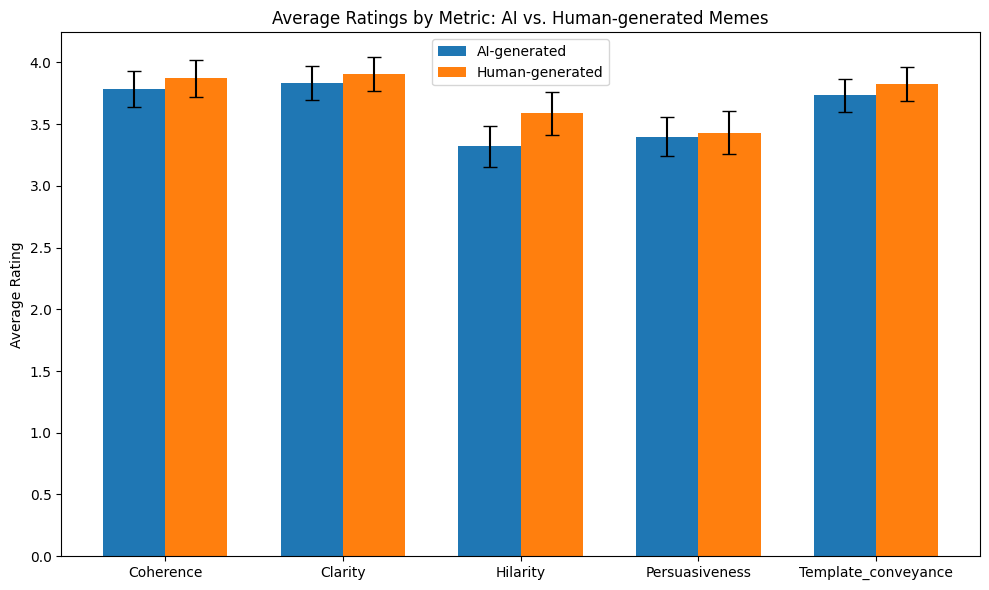

Numerical Results:
Coherence:
  AI-generated: Mean = 3.79, 95% CI = ±0.15
  Human-generated: Mean = 3.87, 95% CI = ±0.15

Clarity:
  AI-generated: Mean = 3.83, 95% CI = ±0.14
  Human-generated: Mean = 3.90, 95% CI = ±0.14

Hilarity:
  AI-generated: Mean = 3.32, 95% CI = ±0.17
  Human-generated: Mean = 3.59, 95% CI = ±0.17

Persuasiveness:
  AI-generated: Mean = 3.40, 95% CI = ±0.16
  Human-generated: Mean = 3.43, 95% CI = ±0.17

Template_conveyance:
  AI-generated: Mean = 3.73, 95% CI = ±0.14
  Human-generated: Mean = 3.82, 95% CI = ±0.14



In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# We'll store the overall means and confidence intervals in dictionaries
ai_means = {}
ai_ci = {}
human_means = {}
human_ci = {}

# Define a function to compute overall mean and 95% CI given a DataFrame column of ratings
def compute_stats(ratings):
    # ratings is a pandas Series of numeric values
    n = ratings.count()
    if n == 0:
        return np.nan, np.nan
    mean_val = ratings.mean()
    std_val = ratings.std(ddof=1)
    se = std_val / np.sqrt(n)
    ci_half = 1.96 * se
    return mean_val, ci_half

# --- Loop Over Each Metric and Compute Overall Averages ---
for metric in metrics:
    # For AI-generated memes: select columns with meme1 to meme7
    ai_pattern = rf"^claim\d+_meme([1-7])_{metric}$"
    ai_cols = [col for col in df_post.columns if re.search(ai_pattern, col)]
    # For human-generated memes: select columns with meme8
    human_pattern = rf"^claim\d+_meme8_{metric}$"
    human_cols = [col for col in df_post.columns if re.search(human_pattern, col)]
    
    # Compute per-participant averages for AI and human ratings for this metric,
    # then compute overall mean and CI across all participants.
    if ai_cols:
        # Convert selected columns to numeric and compute row-wise average
        ai_avg = df_post[ai_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)
        ai_mean, ai_ci_half = compute_stats(ai_avg)
    else:
        ai_mean, ai_ci_half = np.nan, np.nan
        
    if human_cols:
        human_avg = df_post[human_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)
        human_mean, human_ci_half = compute_stats(human_avg)
    else:
        human_mean, human_ci_half = np.nan, np.nan
        
    ai_means[metric] = ai_mean
    ai_ci[metric] = ai_ci_half
    human_means[metric] = human_mean
    human_ci[metric] = human_ci_half

# --- Prepare Data for Plotting ---
metric_labels = [m.capitalize() for m in metrics]
x = np.arange(len(metrics))
width = 0.35  # width of each bar

# Create arrays for means and errors in the order of metrics
ai_means_arr = np.array([ai_means[m] for m in metrics])
ai_ci_arr = np.array([ai_ci[m] for m in metrics])
human_means_arr = np.array([human_means[m] for m in metrics])
human_ci_arr = np.array([human_ci[m] for m in metrics])

# --- Plot Grouped Bar Chart ---
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, ai_means_arr, width, yerr=ai_ci_arr, capsize=5, label='AI-generated')
rects2 = ax.bar(x + width/2, human_means_arr, width, yerr=human_ci_arr, capsize=5, label='Human-generated')

ax.set_ylabel("Average Rating")
ax.set_title("Average Ratings by Metric: AI vs. Human-generated Memes")
ax.set_xticks(x)
ax.set_xticklabels(metric_labels)
ax.legend()

plt.tight_layout()

# Save the plot with a timestamp in the filename.
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/metrics_comparison_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

# Print out the numerical plots
print("Numerical Results:")
for metric in metrics:
    print(f"{metric.capitalize()}:")
    print(f"  AI-generated: Mean = {ai_means[metric]:.2f}, 95% CI = ±{ai_ci[metric]:.2f}")
    print(f"  Human-generated: Mean = {human_means[metric]:.2f}, 95% CI = ±{human_ci[metric]:.2f}\n")

# Pro democrat or pro republican claims per metric

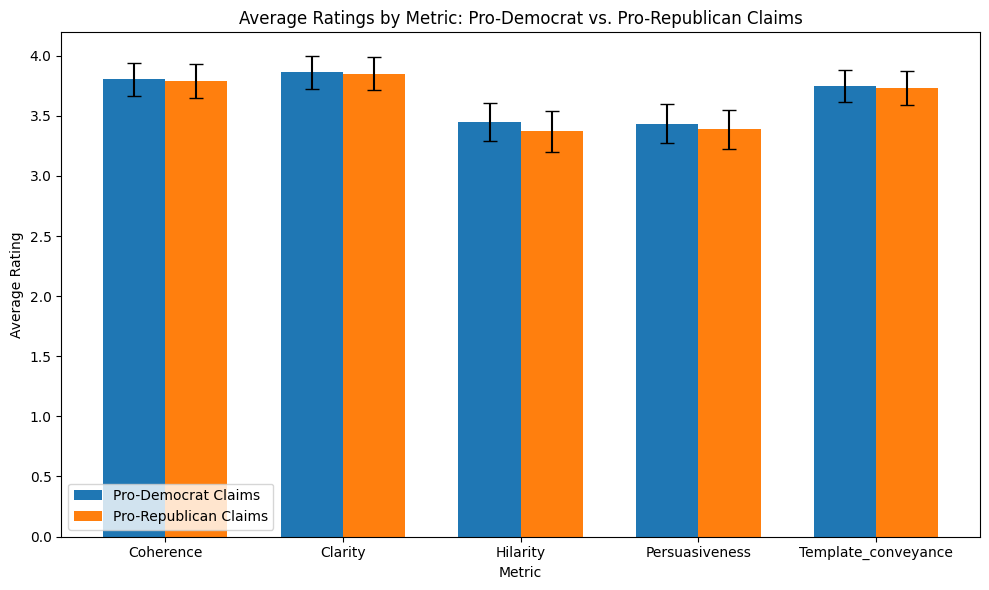

Coherence:
  Pro-Democrat: Mean = 3.80 (n = 108), CI = ±0.14
  Pro-Republican: Mean = 3.79 (n = 109), CI = ±0.14

Clarity:
  Pro-Democrat: Mean = 3.86 (n = 108), CI = ±0.13
  Pro-Republican: Mean = 3.85 (n = 109), CI = ±0.14

Hilarity:
  Pro-Democrat: Mean = 3.45 (n = 108), CI = ±0.16
  Pro-Republican: Mean = 3.37 (n = 109), CI = ±0.17

Persuasiveness:
  Pro-Democrat: Mean = 3.44 (n = 108), CI = ±0.16
  Pro-Republican: Mean = 3.39 (n = 109), CI = ±0.16

Template_conveyance:
  Pro-Democrat: Mean = 3.75 (n = 108), CI = ±0.13
  Pro-Republican: Mean = 3.73 (n = 109), CI = ±0.14



In [118]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Define the Claim Political Orientation Mapping ---
# These are the claim-level political positions as determined in your study:
claim_political = {
    "claim1": "pro democrat",
    "claim2": "pro republican",
    "claim3": "pro democrat",
    "claim4": "pro republican",
    "claim5": "pro democrat",
    "claim6": "pro republican",
    "claim7": "pro democrat",
    "claim8": "pro republican",
    "claim9": "pro democrat",
    "claim10": "pro republican",
    "claim11": "pro democrat",
    "claim12": "pro republican"
}

# Separate the claim IDs into two groups based on their political orientation:
dem_claims = sorted([claim for claim, pol in claim_political.items() if pol == "pro democrat"],
                    key=lambda x: int(re.search(r'\d+', x).group()))
rep_claims = sorted([claim for claim, pol in claim_political.items() if pol == "pro republican"],
                    key=lambda x: int(re.search(r'\d+', x).group()))

# --- Compute Per-Participant Average Ratings for Each Metric and Each Claim Group ---
# We will compute, for each participant, a single average for each metric for pro-democrat claims
# and another average for pro-republican claims.
df_avg = pd.DataFrame()
df_avg["prolific_id"] = df_post["prolific_id"]

for metric in metrics:
    # For Pro-Democrat Claims
    dem_avgs = []
    for claim in dem_claims:
        # Select columns that match exactly "claimX_meme\d+_{metric}"
        pattern = rf"^{claim}_meme\d+_{metric}$"
        cols = [col for col in df_post.columns if re.search(pattern, col)]
        if cols:
            # Compute the row-wise average for this claim
            claim_avg = df_post[cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)
            dem_avgs.append(claim_avg)
    if dem_avgs:
        # Average the claim-level averages across all pro-democrat claims (per participant)
        df_avg[f"avg_dem_{metric}"] = pd.concat(dem_avgs, axis=1).mean(axis=1)
    else:
        df_avg[f"avg_dem_{metric}"] = np.nan

    # For Pro-Republican Claims
    rep_avgs = []
    for claim in rep_claims:
        pattern = rf"^{claim}_meme\d+_{metric}$"
        cols = [col for col in df_post.columns if re.search(pattern, col)]
        if cols:
            claim_avg = df_post[cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)
            rep_avgs.append(claim_avg)
    if rep_avgs:
        df_avg[f"avg_rep_{metric}"] = pd.concat(rep_avgs, axis=1).mean(axis=1)
    else:
        df_avg[f"avg_rep_{metric}"] = np.nan

# --- Compute Overall Summary Statistics Across Participants ---
results = {}
for metric in metrics:
    results[metric] = {}
    for group in ["dem", "rep"]:
        col = f"avg_{group}_{metric}"
        vals = df_avg[col].dropna()
        n = len(vals)
        if n > 0:
            mean_val = vals.mean()
            std_val = vals.std(ddof=1)
            se = std_val / np.sqrt(n)
            ci_half = 1.96 * se
        else:
            mean_val, se, ci_half, n = np.nan, np.nan, np.nan, 0
        results[metric][group] = {"mean": mean_val, "n": n, "se": se, "ci_half": ci_half}

# --- Plot a Grouped Bar Chart ---
x = np.arange(len(metrics))
width = 0.35

dem_means = [results[metric]["dem"]["mean"] for metric in metrics]
dem_err = [results[metric]["dem"]["ci_half"] for metric in metrics]
rep_means = [results[metric]["rep"]["mean"] for metric in metrics]
rep_err = [results[metric]["rep"]["ci_half"] for metric in metrics]

plt.figure(figsize=(10,6))
plt.bar(x - width/2, dem_means, width, yerr=dem_err, capsize=5, label="Pro-Democrat Claims")
plt.bar(x + width/2, rep_means, width, yerr=rep_err, capsize=5, label="Pro-Republican Claims")
plt.xticks(x, [m.capitalize() for m in metrics])
plt.xlabel("Metric")
plt.ylabel("Average Rating")
plt.title("Average Ratings by Metric: Pro-Democrat vs. Pro-Republican Claims")
plt.legend()
plt.tight_layout()

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../plots/postselection_data/metrics_by_claim_type_{timestamp}.png"
plt.savefig(plot_filename)
plt.show()

# --- Print Detailed Results ---
for metric in metrics:
    print(f"{metric.capitalize()}:")
    print(f"  Pro-Democrat: Mean = {results[metric]['dem']['mean']:.2f} (n = {results[metric]['dem']['n']}), CI = ±{results[metric]['dem']['ci_half']:.2f}")
    print(f"  Pro-Republican: Mean = {results[metric]['rep']['mean']:.2f} (n = {results[metric]['rep']['n']}), CI = ±{results[metric]['rep']['ci_half']:.2f}\n")


# Corr political orientation pro-democrat and pro republican metrics ratings

In [80]:
import pandas as pd
import numpy as np
import re
from scipy.stats import f_oneway

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Define the Claim Political Orientation Mapping ---
claim_political = {
    "claim1": "pro democrat",
    "claim2": "pro republican",
    "claim3": "pro democrat",
    "claim4": "pro republican",
    "claim5": "pro democrat",
    "claim6": "pro republican",
    "claim7": "pro democrat",
    "claim8": "pro republican",
    "claim9": "pro democrat",
    "claim10": "pro republican",
    "claim11": "pro democrat",
    "claim12": "pro republican"
}
# Separate claim identifiers into two groups:
dem_claims = sorted([claim for claim, pol in claim_political.items() if pol == "pro democrat"],
                    key=lambda x: int(re.search(r'\d+', x).group()))
rep_claims = sorted([claim for claim, pol in claim_political.items() if pol == "pro republican"],
                    key=lambda x: int(re.search(r'\d+', x).group()))

# --- Compute Per-Participant Average Ratings for Each Metric and Each Claim Group ---
df_avg = pd.DataFrame()
df_avg["prolific_id"] = post["prolific_id"]

for metric in metrics:
    # For pro-democrat claims:
    dem_avgs = []
    for claim in dem_claims:
        # Use a strict regex pattern to match columns like "claimX_memeY_metric" exactly.
        pattern = rf"^{claim}_meme\d+_{metric}$"
        cols = [col for col in post.columns if re.search(pattern, col)]
        if cols:
            claim_avg = post[cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)
            dem_avgs.append(claim_avg)
    if dem_avgs:
        # Average across all pro-democrat claims per participant.
        df_avg[f"avg_dem_{metric}"] = pd.concat(dem_avgs, axis=1).mean(axis=1)
    else:
        df_avg[f"avg_dem_{metric}"] = np.nan
        
    # For pro-republican claims:
    rep_avgs = []
    for claim in rep_claims:
        pattern = rf"^{claim}_meme\d+_{metric}$"
        cols = [col for col in post.columns if re.search(pattern, col)]
        if cols:
            claim_avg = post[cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)
            rep_avgs.append(claim_avg)
    if rep_avgs:
        df_avg[f"avg_rep_{metric}"] = pd.concat(rep_avgs, axis=1).mean(axis=1)
    else:
        df_avg[f"avg_rep_{metric}"] = np.nan

# --- Merge the Averages with Demographics ---
merged = pd.merge(demographics, df_avg, on="prolific_id", how="inner")

# --- Filter Out Rows Where political_orientation is "I prefer not to answer" ---
merged = merged[merged["political_orientation"] != "I prefer not to answer"]

# --- Recode Political Orientation into Three Groups ---
def recode_pol(orientation):
    # Grouping into three groups:
    if orientation in ["4 (Moderately Liberal) ", "5 (Very Liberal)"]:
        return "Liberal"
    elif orientation == "3 (Moderate)":
        return "Moderate"
    elif orientation in ["2 (Moderately Conservative)", "1 (Very Conservative)"]:
        return "Conservative"
    else:
        return None

merged["pol_group"] = merged["political_orientation"].apply(recode_pol)

# --- For Each Metric and Each Claim Type, Output Descriptive Statistics and ANOVA Results ---
print("Average Ratings by Metric and Participant Political Orientation (for pro-democrat vs. pro-republican claims):\n")
for metric in metrics:
    for claim_type, label in [("dem", "Pro-Democrat"), ("rep", "Pro-Republican")]:
        col = f"avg_{claim_type}_{metric}"
        print(f"Metric: {metric.capitalize()}, Claim Type: {label}")
        group_data = merged.groupby("pol_group")[col].apply(lambda x: x.dropna().values)
        for group, values in group_data.items():
            print(f"  {group}: n = {len(values)}, Mean = {np.mean(values):.2f}")
        # Perform one-way ANOVA if at least two groups have data
        groups = [values for values in group_data if len(values) > 0]
        if len(groups) >= 2:
            f_stat, p_val = f_oneway(*groups)
            print(f"  ANOVA: F = {f_stat:.3f}, p = {p_val:.3f}")
        else:
            print("  ANOVA: Not enough groups for comparison.")
        print()

Average Ratings by Metric and Participant Political Orientation (for pro-democrat vs. pro-republican claims):

Metric: Coherence, Claim Type: Pro-Democrat
  Conservative: n = 29, Mean = 3.81
  Liberal: n = 27, Mean = 3.77
  Moderate: n = 29, Mean = 3.70
  ANOVA: F = 0.142, p = 0.868

Metric: Coherence, Claim Type: Pro-Republican
  Conservative: n = 30, Mean = 3.79
  Liberal: n = 27, Mean = 3.84
  Moderate: n = 29, Mean = 3.72
  ANOVA: F = 0.167, p = 0.846

Metric: Clarity, Claim Type: Pro-Democrat
  Conservative: n = 29, Mean = 3.98
  Liberal: n = 27, Mean = 3.89
  Moderate: n = 29, Mean = 3.68
  ANOVA: F = 1.384, p = 0.256

Metric: Clarity, Claim Type: Pro-Republican
  Conservative: n = 30, Mean = 3.85
  Liberal: n = 27, Mean = 3.89
  Moderate: n = 29, Mean = 3.70
  ANOVA: F = 0.485, p = 0.617

Metric: Hilarity, Claim Type: Pro-Democrat
  Conservative: n = 29, Mean = 3.56
  Liberal: n = 27, Mean = 3.42
  Moderate: n = 29, Mean = 3.38
  ANOVA: F = 0.335, p = 0.716

Metric: Hilarity, Cl

# Each model vs human on each metri 

In [81]:
import pandas as pd
import numpy as np
import re
from scipy.stats import ttest_rel

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Compare Each AI Model vs. Humans for Each Metric ---
results = {}

for metric in metrics:
    print(f"Metric: {metric.capitalize()}")
    results[metric] = {}
    # Loop over AI models (meme1 to meme7)
    for m in range(1, 8):
        ai_model = f"meme{m}"
        # Construct regex patterns for columns
        pattern_ai = rf"^claim\d+_{ai_model}_{metric}$"
        pattern_human = rf"^claim\d+_meme8_{metric}$"
        
        # Select columns for this AI model and for humans
        ai_cols = [col for col in df_post.columns if re.search(pattern_ai, col)]
        human_cols = [col for col in df_post.columns if re.search(pattern_human, col)]
        
        # Compute per-participant averages for this metric
        if ai_cols:
            ai_avg = df_post[ai_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)
        else:
            ai_avg = pd.Series(np.nan, index=df_post.index)
            
        if human_cols:
            human_avg = df_post[human_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)
        else:
            human_avg = pd.Series(np.nan, index=df_post.index)
        
        # Keep only participants with valid ratings for both AI and human for this metric
        valid_mask = ai_avg.notna() & human_avg.notna()
        ai_valid = ai_avg[valid_mask]
        human_valid = human_avg[valid_mask]
        n_valid = len(ai_valid)
        
        if n_valid > 0:
            # Perform paired t-test: test whether human ratings differ from AI ratings (human - AI)
            t_stat, p_val = ttest_rel(human_valid, ai_valid)
            mean_diff = human_valid.mean() - ai_valid.mean()
        else:
            t_stat, p_val, mean_diff = np.nan, np.nan, np.nan
        
        results[metric][ai_model] = {
            "n": n_valid,
            "mean_ai": ai_valid.mean() if n_valid > 0 else np.nan,
            "mean_human": human_valid.mean() if n_valid > 0 else np.nan,
            "mean_diff": mean_diff,
            "t_stat": t_stat,
            "p_val": p_val
        }
        
        print(f"  AI Model {ai_model}:")
        print(f"    n = {n_valid}")
        print(f"    Mean AI rating: {results[metric][ai_model]['mean_ai']:.2f}")
        print(f"    Mean Human rating: {results[metric][ai_model]['mean_human']:.2f}")
        print(f"    Mean difference (Human - AI): {mean_diff:.2f}")
        print(f"    Paired t-test: t = {t_stat:.3f}, p = {p_val:.3f}\n")


Metric: Coherence
  AI Model meme1:
    n = 73
    Mean AI rating: 4.11
    Mean Human rating: 3.93
    Mean difference (Human - AI): -0.18
    Paired t-test: t = -1.879, p = 0.064

  AI Model meme2:
    n = 63
    Mean AI rating: 3.78
    Mean Human rating: 3.97
    Mean difference (Human - AI): 0.19
    Paired t-test: t = 2.264, p = 0.027

  AI Model meme3:
    n = 48
    Mean AI rating: 3.68
    Mean Human rating: 3.83
    Mean difference (Human - AI): 0.14
    Paired t-test: t = 1.121, p = 0.268

  AI Model meme4:
    n = 47
    Mean AI rating: 3.38
    Mean Human rating: 3.70
    Mean difference (Human - AI): 0.32
    Paired t-test: t = 2.742, p = 0.009

  AI Model meme5:
    n = 62
    Mean AI rating: 3.44
    Mean Human rating: 3.95
    Mean difference (Human - AI): 0.51
    Paired t-test: t = 4.431, p = 0.000

  AI Model meme6:
    n = 60
    Mean AI rating: 3.87
    Mean Human rating: 3.95
    Mean difference (Human - AI): 0.09
    Paired t-test: t = 0.883, p = 0.381

  AI Mod

# Factor analysis on the metrics

Descriptive statistics for the factor analysis data:
       avg_coherence  avg_clarity  avg_hilarity  avg_persuasiveness  \
count     109.000000   109.000000    109.000000          109.000000   
mean        3.797378     3.858851      3.416039            3.402246   
std         0.705311     0.668019      0.826806            0.824461   
min         1.416667     1.333333      1.416667            1.363636   
25%         3.444444     3.428571      2.818182            2.916667   
50%         3.916667     4.000000      3.454545            3.454545   
75%         4.250000     4.333333      4.000000            4.000000   
max         5.000000     5.000000      5.000000            5.000000   

       avg_template_conveyance  
count               109.000000  
mean                  3.738415  
std                   0.681951  
min                   1.666667  
25%                   3.181818  
50%                   3.833333  
75%                   4.166667  
max                   5.000000  

Number of

/opt/anaconda3/envs/MemeFact/lib/python3.12/site-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


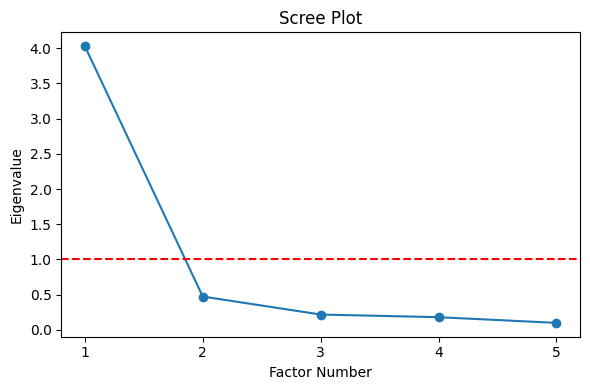

In [82]:
import pandas as pd
import numpy as np
import re
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Compute Per-Participant Average Rating for Each Metric (excluding "none" columns) ---
for metric in metrics:
    # Use a regex to select columns that exactly match "claimX_memeY_metric"
    pattern = rf"^claim\d+_meme\d+_{metric}$"
    cols = [col for col in df_post.columns if re.search(pattern, col) and "none" not in col]
    # Compute the row-wise average across these columns
    df_post[f"avg_{metric}"] = df_post[cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# --- Create a DataFrame for Factor Analysis ---
# We'll use the computed average ratings for the five metrics.
fa_data = df_post[[f"avg_{metric}" for metric in metrics]].dropna()

print("Descriptive statistics for the factor analysis data:")
print(fa_data.describe())
print("\nNumber of participants included for factor analysis:", len(fa_data), "\n")

# --- Check Suitability for Factor Analysis ---
kmo_all, kmo_model = calculate_kmo(fa_data)
chi_square_value, p_value = calculate_bartlett_sphericity(fa_data)
print("Kaiser-Meyer-Olkin (KMO) Test:")
print(f"  Overall KMO Measure: {kmo_model:.3f}")
print("Bartlett's Test of Sphericity:")
print(f"  Chi-square: {chi_square_value:.3f}, p-value: {p_value:.3f}\n")

# --- Run Initial Factor Analysis to Get Eigenvalues ---
fa_initial = FactorAnalyzer(n_factors=5, rotation=None)
fa_initial.fit(fa_data)
ev, v = fa_initial.get_eigenvalues()
print("Eigenvalues for each factor:")
print(ev)

# Determine number of factors with eigenvalue > 1 (Kaiser criterion)
n_factors = sum(ev > 1)
print(f"\nNumber of factors with eigenvalue > 1: {n_factors}\n")

# --- Run Factor Analysis with the Chosen Number of Factors and Varimax Rotation ---
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(fa_data)
loadings = fa.loadings_

print("Rotated Factor Loadings (Varimax):")
for i, metric in enumerate(metrics):
    print(f"{metric.capitalize()}: {loadings[i]}")
    
# Optionally, you can also plot the scree plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.title("Scree Plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.axhline(y=1, color='r', linestyle='--')
plt.xticks(range(1, len(ev)+1))
plt.tight_layout()
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plt.savefig(f"../plots/postselection_data/scree_plot_{timestamp}.png")
plt.show()


# Ratings per meme per claim

In [87]:
import pandas as pd
import re

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Identify Unique Claim Identifiers Excluding "none" Columns ---
# We assume column names are like "claimX_memeY_metric"
claim_pattern = r"^(claim\d+)_"
claims = sorted({re.match(claim_pattern, col).group(1)
                 for col in df_post.columns 
                 if re.match(claim_pattern, col) and "none" not in col},
                key=lambda x: int(re.search(r"\d+", x).group()))

print("Number of participants who rated each meme (per claim):\n")
for claim in claims:
    print(f"{claim}:")
    for meme in range(1, 9):  # Loop over meme1 to meme8
        # Construct expected column names for this claim and meme for each metric.
        expected_cols = [f"{claim}_meme{meme}_{metric}" for metric in metrics]
        # Only consider columns that actually exist.
        valid_cols = [col for col in expected_cols if col in df_post.columns]
        if valid_cols:
            # For each participant (each row), check if at least one of the valid_cols is non-NaN.
            count = df_post[valid_cols].notna().any(axis=1).sum()
            print(f"  Meme {meme}: {count} participants")
        else:
            print(f"  Meme {meme}: No columns found")
    print()

Number of participants who rated each meme (per claim):

claim1:
  Meme 1: 50 participants
  Meme 2: 4 participants
  Meme 3: 10 participants
  Meme 4: 6 participants
  Meme 5: 3 participants
  Meme 6: 7 participants
  Meme 7: 2 participants
  Meme 8: 23 participants

claim2:
  Meme 1: 6 participants
  Meme 2: 20 participants
  Meme 3: 5 participants
  Meme 4: 9 participants
  Meme 5: 9 participants
  Meme 6: 6 participants
  Meme 7: 6 participants
  Meme 8: 36 participants

claim3:
  Meme 1: 2 participants
  Meme 2: 20 participants
  Meme 3: 1 participants
  Meme 4: 12 participants
  Meme 5: 18 participants
  Meme 6: 1 participants
  Meme 7: 1 participants
  Meme 8: 42 participants

claim4:
  Meme 1: 6 participants
  Meme 2: 11 participants
  Meme 3: 2 participants
  Meme 4: 2 participants
  Meme 5: 6 participants
  Meme 6: 9 participants
  Meme 7: 6 participants
  Meme 8: 49 participants

claim5:
  Meme 1: 6 participants
  Meme 2: 4 participants
  Meme 3: 5 participants
  Meme 4: 2 p

# Internal consistency per metric

In [96]:
import pandas as pd
import numpy as np
import re
import pingouin as pg

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

# --- Set the Minimum Threshold for Valid Ratings (Complete Cases) per Meme ---
min_ratings = 10

# --- Identify Unique Claim Identifiers (excluding "none" columns) ---
claim_pattern = r"^(claim\d+)_"
claims = sorted({re.match(claim_pattern, col).group(1)
                 for col in df_post.columns
                 if re.match(claim_pattern, col)},
                key=lambda x: int(re.search(r"\d+", x).group()))

icc_values = []

print("ICC (ICC2) for Each Meme (if n >= {}):\n".format(min_ratings))

# Loop over each claim and each meme position (1 to 8)
for claim in claims:
    for meme in range(1, 9):
        # Construct expected column names for the 5 metrics for this claim and meme.
        cols = [f"{claim}_meme{meme}_{metric}" for metric in metrics]
        # Only use columns that actually exist.
        valid_cols = [col for col in cols if col in df_post.columns]
        if not valid_cols or len(valid_cols) < 2:
            continue  # Need at least 2 items to compute ICC
        
        # Extract data for these columns and convert to numeric
        data = df_post[valid_cols].apply(pd.to_numeric, errors='coerce')
        # Drop rows with any missing values (i.e. complete cases)
        data_complete = data.dropna()
        n_complete = data_complete.shape[0]
        
        if n_complete >= min_ratings:
            # Reshape the data into long format required for ICC:
            # each row = one rating, with columns: participant ('index'), item ('metric'), rating ('rating')
            df_long = data_complete.reset_index().melt(id_vars='index', value_vars=valid_cols,
                                                       var_name='metric', value_name='rating')
            # Compute ICC2 using pingouin (two-way random effects model with absolute agreement)
            icc_result = pg.intraclass_corr(data=df_long, targets='index', raters='metric', ratings='rating')
            icc_val = icc_result.loc[icc_result['Type'] == 'ICC2', 'ICC'].values[0]
            icc_values.append(icc_val)
            print(f"{claim} - Meme {meme}: n = {n_complete}, ICC2 = {icc_val:.3f}")
        else:
            print(f"{claim} - Meme {meme}: n = {n_complete} (too few ratings)")
            
# Compute and print final average ICC from all valid memes
if icc_values:
    avg_icc = np.mean(icc_values)
    print("\nFinal Average ICC (across {} memes): {:.3f}".format(len(icc_values), avg_icc))
else:
    print("\nNo memes had sufficient ratings to compute ICC.")

ICC (ICC2) for Each Meme (if n >= 10):

claim1 - Meme 1: n = 50, ICC2 = 0.577
claim1 - Meme 2: n = 4 (too few ratings)
claim1 - Meme 3: n = 10, ICC2 = 0.130
claim1 - Meme 4: n = 6 (too few ratings)
claim1 - Meme 5: n = 3 (too few ratings)
claim1 - Meme 6: n = 7 (too few ratings)
claim1 - Meme 7: n = 2 (too few ratings)
claim1 - Meme 8: n = 23, ICC2 = 0.673
claim2 - Meme 1: n = 6 (too few ratings)
claim2 - Meme 2: n = 20, ICC2 = 0.423
claim2 - Meme 3: n = 5 (too few ratings)
claim2 - Meme 4: n = 9 (too few ratings)
claim2 - Meme 5: n = 9 (too few ratings)
claim2 - Meme 6: n = 6 (too few ratings)
claim2 - Meme 7: n = 6 (too few ratings)
claim2 - Meme 8: n = 36, ICC2 = 0.586
claim3 - Meme 1: n = 2 (too few ratings)
claim3 - Meme 2: n = 20, ICC2 = 0.490
claim3 - Meme 3: n = 1 (too few ratings)
claim3 - Meme 4: n = 12, ICC2 = 0.860
claim3 - Meme 5: n = 18, ICC2 = 0.614
claim3 - Meme 6: n = 1 (too few ratings)
claim3 - Meme 7: n = 1 (too few ratings)
claim3 - Meme 8: n = 42, ICC2 = 0.638
cla

# ICC per metric

In [97]:
import pandas as pd
import numpy as np
import re
import pingouin as pg

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Metrics of Interest ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

print("Internal Consistency (Cronbach's alpha) for Each Metric Across All Memes (excluding 'none' columns):\n")

for metric in metrics:
    # Select columns that exactly match "claim\d+_meme\d+_{metric}" (and exclude any columns with "none")
    pattern = rf"^claim\d+_meme\d+_{metric}$"
    metric_cols = [col for col in df_post.columns if re.search(pattern, col) and "none" not in col]
    
    if len(metric_cols) < 2:
        print(f"{metric.capitalize()}: Not enough items to compute reliability (found {len(metric_cols)} column(s)).")
        continue

    # Create a DataFrame with the selected columns and convert values to numeric
    df_metric = df_post[metric_cols].apply(pd.to_numeric, errors='coerce')
    
    # Option: Impute missing values with column means (if there are missing values)
    df_metric_imputed = df_metric.fillna(df_metric.mean())
    
    # Compute Cronbach's alpha using pingouin
    alpha, _ = pg.cronbach_alpha(data=df_metric_imputed)
    n_items = len(metric_cols)
    n_participants = df_metric_imputed.shape[0]
    print(f"{metric.capitalize()}: Cronbach's alpha = {alpha:.3f} (based on {n_items} items across {n_participants} participants)")


Internal Consistency (Cronbach's alpha) for Each Metric Across All Memes (excluding 'none' columns):

Coherence: Cronbach's alpha = 0.806 (based on 96 items across 110 participants)
Clarity: Cronbach's alpha = 0.806 (based on 96 items across 110 participants)
Hilarity: Cronbach's alpha = 0.826 (based on 96 items across 110 participants)
Persuasiveness: Cronbach's alpha = 0.835 (based on 96 items across 110 participants)
Template_conveyance: Cronbach's alpha = 0.818 (based on 96 items across 110 participants)


In [99]:
import pandas as pd
import numpy as np
import re
from scipy.stats import ttest_1samp

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Define the Claim Political Orientation Mapping ---
# This mapping assigns each claim to either "pro democrat" or "pro republican"
claim_political = {
    "claim1": "pro democrat",
    "claim2": "pro republican",
    "claim3": "pro democrat",
    "claim4": "pro republican",
    "claim5": "pro democrat",
    "claim6": "pro republican",
    "claim7": "pro democrat",
    "claim8": "pro republican",
    "claim9": "pro democrat",
    "claim10": "pro republican",
    "claim11": "pro democrat",
    "claim12": "pro republican"
}

# --- Create a DataFrame with Rejection Indicators ---
# We assume rejection reasons are in columns named exactly "claimX_none_rejection_reasons"
none_cols = [col for col in post.columns if re.search(r"^claim\d+_none_rejection_reasons$", col)]
# For each such column, create a binary indicator: 1 if non-empty (after stripping), 0 otherwise.
df_none = post[none_cols].fillna("")
for col in none_cols:
    df_none[col] = df_none[col].str.strip().ne("").astype(int)

# --- Sum Rejections per Claim Type for Each Participant ---
# Create a DataFrame to hold counts for each participant.
rejections = pd.DataFrame()
rejections["prolific_id"] = post["prolific_id"]

# Initialize counts
rejections["rejections_dem"] = 0
rejections["rejections_rep"] = 0

# Loop over each claim in the mapping.
for claim, pol in claim_political.items():
    col_name = f"{claim}_none_rejection_reasons"
    if col_name in df_none.columns:
        if pol == "pro democrat":
            rejections["rejections_dem"] += df_none[col_name]
        elif pol == "pro republican":
            rejections["rejections_rep"] += df_none[col_name]

# --- Merge Rejection Counts with Demographics ---
merged = pd.merge(demographics, rejections, on="prolific_id", how="inner")

# --- Filter Out Moderates (if desired) ---
# We focus on participants with clear political leanings.
# For this analysis, we exclude those whose political_orientation is "Moderate".
merged = merged[merged["political_orientation"] != "Moderate"]

# --- Recode Political Orientation into Two Groups ---
# For our purposes, define:
#    Liberal: "Very Liberal" or "Moderately Liberal"
#    Conservative: "Very Conservative" or "Moderately Conservative"
def recode_pol(orientation):
    if orientation in ["5( Very Libera)l", "4 (Moderately Liberal)"]:
        return "Liberal"
    elif orientation in ["1 (Very Conservative)", "2 (Moderately Conservative)"]:
        return "Conservative"
    else:
        return None

merged["pol_group"] = merged["political_orientation"].apply(recode_pol)

# Drop any rows where pol_group is missing.
merged = merged.dropna(subset=["pol_group"])

# --- For Each Participant, Compute Congruent and Incongruent Rejections ---
# If the participant is Liberal, congruent rejections are those for pro-democrat claims,
# and incongruent rejections are those for pro-republican claims.
# If the participant is Conservative, congruent rejections are those for pro-republican claims,
# and incongruent rejections are those for pro-democrat claims.
def compute_rejection_diff(row):
    if row["pol_group"] == "Liberal":
        congruent = row["rejections_dem"]
        incongruent = row["rejections_rep"]
    elif row["pol_group"] == "Conservative":
        congruent = row["rejections_rep"]
        incongruent = row["rejections_dem"]
    else:
        congruent = np.nan
        incongruent = np.nan
    return incongruent - congruent

merged["rejection_diff"] = merged.apply(compute_rejection_diff, axis=1)

# --- Print Descriptive Statistics ---
print("Descriptive Statistics for Rejection Counts by Political Group:")
for group in merged["pol_group"].unique():
    group_df = merged[merged["pol_group"] == group]
    print(f"\n{group}:")
    print(f"  Mean rejections (congruent): {group_df.apply(lambda r: r['rejections_dem'] if group=='Liberal' else r['rejections_rep'], axis=1).mean():.2f}")
    print(f"  Mean rejections (incongruent): {group_df.apply(lambda r: r['rejections_rep'] if group=='Liberal' else r['rejections_dem'], axis=1).mean():.2f}")
    print(f"  Mean difference (incongruent - congruent): {group_df['rejection_diff'].mean():.2f} (n = {group_df.shape[0]})")

# --- Statistical Test: One-sample t-test on the Difference (across all participants) ---
# Test whether the average difference is significantly greater than 0.
from scipy.stats import ttest_1samp
diffs = merged["rejection_diff"].dropna()
t_stat, p_val = ttest_1samp(diffs, 0)
print("\nOne-sample t-test on the rejection difference (incongruent - congruent) across all participants:")
print(f"  t = {t_stat:.3f}, p = {p_val:.3f}")

# Alternatively, you might run separate tests for liberals and conservatives.


Descriptive Statistics for Rejection Counts by Political Group:

Conservative:
  Mean rejections (congruent): 0.90
  Mean rejections (incongruent): 0.83
  Mean difference (incongruent - congruent): -0.07 (n = 30)

Liberal:
  Mean rejections (congruent): 1.33
  Mean rejections (incongruent): 1.33
  Mean difference (incongruent - congruent): 0.00 (n = 21)

One-sample t-test on the rejection difference (incongruent - congruent) across all participants:
  t = -0.252, p = 0.802


In [109]:
import pandas as pd
import re
from datetime import datetime

# --- Load the Processed Post-Selection Data ---
df_post = pd.read_csv("../data/postselection_meme_ratings_processed.csv")

# --- Identify Columns for Rejection Reasons ---
# These columns are assumed to be named like "claimX_none_rejection_reasons"
none_reason_cols = [col for col in df_post.columns if re.search(r"^claim\d+_none_rejection_reasons$", col)]

# --- Set Output Filename with Timestamp ---
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_filename = f"../plots/postselection_data/rejection_reasons_{timestamp}.txt"

# --- Write the Content to a Text File ---
with open(output_filename, "w", encoding="utf-8") as f:
    for col in none_reason_cols:
        f.write(f"--- {col} ---\n")
        # Drop NaNs and remove extra whitespace
        responses = df_post[col].dropna().apply(lambda x: x.strip())
        if responses.empty:
            f.write("No responses.\n")
        else:
            for response in responses:
                f.write(response + "\n")
        f.write("\n")

print("Rejection reasons saved to:", output_filename)


Rejection reasons saved to: ../results/postselection_data/rejection_reasons_20250407_191419.txt


In [111]:
import pandas as pd
from datetime import datetime

# --- Load the Demographics Data ---
df_demo = pd.read_csv("../data/participant_demographics.csv")

# --- Specify the Columns to Output ---
cols_to_output = ["comments"]

# Subset the DataFrame
df_subset = df_demo[cols_to_output]

# --- Set Output Filename with Timestamp ---
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_filename = f"../plots/participant_data_{timestamp}.txt"

# --- Write the Subset to a Text File (Tab-delimited) ---
df_subset.to_csv(output_filename, sep="\t", index=False)

print("Demographics data with comments saved to:", output_filename)


Demographics data with comments saved to: ../results/participant_data_20250407_193133.txt
